#### –ù–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –∏–º–ø–æ—Ä—Ç—ã

In [ ]:
# !pip install -r requirements.txt

In [ ]:
# –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
import plotly.express as px
import matplotlib.pyplot as plt

import json
import pandas as pd
import numpy as np
from collections import Counter
from typing import List
from wordcloud import WordCloud
import nltk

# –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from pymorphy2 import MorphAnalyzer

# –¥–ª—è —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from bertopic import BERTopic

# –¥–ª—è —Å—É–º–º–∞—Ä–∏–∑–∞—Ü–∏–∏
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.summarizers.luhn import LuhnSummarizer

from sklearn.manifold import TSNE

# –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π
import pickle

In [ ]:
# !pip list

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

#### –≠—Ç–∞–ø—ã —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á

1. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤
2. –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤
3. –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤
4. –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ
5. –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è —Å—É–º–º–∞—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–º
6. –°–æ–∑–¥–∞–Ω–∏–µ —Å–∏—Å—Ç–µ–º—ã –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –Ω–æ–≤—ã—Ö —Ü–∏—Ç–∞—Ç

#### –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
with open('cintra_phoenix_oils_hr_mgck_feather.json') as f:
    data = json.load(f)

–í –ø–µ—Ä–≤–æ–º –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–∏ –Ω–µ–ª—å–∑—è –Ω–µ –∑–∞–º–µ—Ç–∏—Ç—å –æ–≥—Ä–æ–º–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–µ—á–∞—Ç–æ–∫ –≤ —Å–ª–æ–≤–∞—Ö –∏–∑ —Ü–∏—Ç–∞—Ç, –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–µ –±—É–∫–≤ ("—Ä–∞–π–æ–æ–Ω–µ", "—Å—Ç—Ç–µ–∫–ª—è–Ω–Ω–æ–π" –∏ —Ç.–¥.), –∞ —Ç–∞–∫–∂–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ü–∏—Ñ—Ä –≤–º–µ—Å—Ç–æ –±—É–∫–≤ ("–∫–æ4—É—Ä–Ω–æ", "—Å–∫–∞3—Ç—å") –∏–ª–∏ –∞–Ω–≥–ª–∏–π—Å–∫–∏—Ö –±—É–∫–≤ ("—Å—É–ø–µRRR", "–Ω–æ—ái"). –í–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–æ —Å–ø–µ—Ü–∏—Ñ–∏–∫–∞ —è–∑—ã–∫–∞ –≤–æ –í—Å–µ–ª–µ–Ω–Ω–æ–π, –Ω–æ —è –≤—Å–µ-—Ç–∞–∫–∏ —Ä–µ—à–∏–ª–∞ –≤–æ—Å–ø—Ä–∏–Ω–∏–º–∞—Ç—å —ç—Ç–æ –∏–º–µ–Ω–Ω–æ –∫–∞–∫ –æ—à–∏–±–∫–∏ –∏, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤—ã–¥–µ–ª–µ–Ω–∏—è —Ç–µ–º–∞—Ç–∏–∫ –ø—Ä–∏ –ø–æ–º–æ—â–∏ –º–æ–¥–µ–ª–µ–π, –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å —Ç–µ–∫—Å—Ç—ã —Ü–∏—Ç–∞—Ç –∏ –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç "–º—É—Å–æ—Ä–∞".

In [ ]:
df = pd.DataFrame(data)
df.head()

id                                              quote
0   0  ¬´–£ –Ω–Ω–∞—Å —Å—Ä–µ–¥–∏ –Ω–æ—ái –≤ —Ä–∞–π–æ–æ–Ω–µ 55 —á–∞—Å–æ–≤ —É–ø–∞–ª–∞ –ø–æ...
1   1  –ü—Ä–æ–≥—Ä–∞–º–º—ã –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ —á–µ—Ä–µ–∑ –≥–∏–ª—å–¥–∏—é...
2   2  "–ú—É—Ä—Ä... –ù–æ–≤–∏–≥—Ä–∞–¥ - –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–æ–≤, –¥–∞. –ù–æ –≤...
3   3  –¢–∏–ø–∞, –≤–æ—Ç —É–∂–µ –ø–æ–ª–≥–æ–¥–∞, –∫–∞–∫ –º—ã –∂–¥–µ–º —É—Å—Ç–∞–Ω–æ–≤–∫–∏ —ç...
4   4  "–¢–µ–ø–µ—Ä—å –≤—Å—å—ë —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ! –†–∞–Ω—å—à–µ –±—É–º–∞–∂–∫–∏ –ª–µ—Ç–∞–ª–∏...

–ß—Ç–æ–±—ã –ø—Ä–∏ –æ–±—Ä–∞–±–æ—Ç–∫–µ —Ç–µ–∫—Å—Ç–æ–≤ –Ω–µ –ø–æ—Ç–µ—Ä—è—Ç—å –≤–∞–∂–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, —Å–æ–¥–µ—Ä–∂–∞—â—É—é—Å—è –≤ –∞–±–±—Ä–µ–≤–∏–∞—Ç—É—Ä–∞—Ö, —Å–Ω–∞—á–∞–ª–∞ –∑–∞–º–µ–Ω—é –∞–±–±—Ä–µ–≤–∏–∞—Ç—É—Ä—ã –Ω–∞ –∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è.

In [ ]:
f = open("abbreviations.txt", "r")
abbr_dict = dict()
for x in f:
    abbr, full_form = x.split('-')[0].strip(), x.split('-')[1].strip()
    abbr_dict[abbr] = full_form

abbr_dict

{'–°–£–û–ß': '–°–∏—Å—Ç–µ–º–∞ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ü–∏–æ–Ω–Ω—ã–º–∏ —á–∞—Ä–∞–º–∏',
 '–ó–ú–°': '–ó–∞—á–∞—Ä–æ–≤–∞–Ω–Ω–∞—è –º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏—è',
 '–ù–°–°': '–ù–∞–∑–∞–∏—Ä—Å–∫–∞—è —Å–∏—Å—Ç–µ–º–∞ —Å–ª–∏–≤–∞',
 '–õ–î–°': '–õ–µ–∫–∞—Ä—Å–∫–∏–π –¥–æ–≥–æ–≤–æ—Ä —Å—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏—è',
 '–¶–ò–°–¢': '–¶–∏–Ω—Ç—Ä–∏–π—Å–∫–∏–π —Å—Ç–∞–Ω–¥–∞—Ä—Ç',
 '–°–û–ö–ì': '–°–∏—Å—Ç–µ–º–∞ –æ–ø–ª–∞—Ç—ã –∫–∞—Ä—Ç–æ—á–∫–æ–π –≥–∏–ª—å–¥–∏–∏'}

In [ ]:
def replace_abbreviations(quote: str, abbr_dict: dict) -> str:
    for abbr, full_form in abbr_dict.items():
        quote = quote.replace(abbr, full_form)
    return quote

In [ ]:
df['quote'] = df.apply(lambda x: replace_abbreviations(x['quote'], abbr_dict), axis=1)

#### EDA –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

##### –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω —Ü–∏—Ç–∞—Ç

In [ ]:
df['length'] = df['quote'].apply(lambda x: len(x.split()))

In [ ]:
fig = px.histogram(df, x='length', color_discrete_sequence=['#7BECF7'], marginal='box', nbins=40, title="–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω —Ü–∏—Ç–∞—Ç")

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    width=1300,
    height=500,
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(color='#FFFFFF')
)

fig.update_xaxes(title_text='–î–ª–∏–Ω–∞ —Ü–∏—Ç–∞—Ç—ã', row=1, col=1)
fig.update_yaxes(title_text='–ß–∞—Å—Ç–æ—Ç–∞', row=1, col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='white', gridcolor='white')

fig.show()

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Ü–∏—Ç–∞—Ç –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Å–æ–±–æ–π –∫–æ—Ä–æ—Ç–∫–∏–µ —Ç–µ–∫—Å—Ç—ã (75% –∏–º–µ—é—Ç –¥–ª–∏–Ω—É 50 –∏ –º–µ–Ω—å—à–µ). –ú–æ–¥–∞–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª–∏–Ω—ã —Ü–∏—Ç–∞—Ç ‚Äî 30-39 —Å–ª–æ–≤.

In [ ]:
df[df['length'] == 4]['quote'].values[0]
# —Å–∞–º–∞—è –∫–æ—Ä–æ—Ç–∫–∞—è —Ü–∏—Ç–∞—Ç–∞

'–í "–§–§–µ–Ω–∏–∫—Å–µ"  –ª–ª—É—á—à–µ –±—ã–ª–æ. \n'

In [ ]:
df[df['length'] == 365]['quote'].values[0]
# —Å–∞–º–∞—è –¥–ª–∏–Ω–Ω–∞—è —Ü–∏—Ç–∞—Ç–∞

'‚Äú–∞–ª—Ö–∏–º–∏—á–µ—Å–∫–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ, –º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –±–∞–∑–∞. –ò–Ω–∞—á–µ —á–µ–ª–æ–≤–µ–∫—É —Å–æ–≤—Å–µ–º —Ç—è–∂–µ–ª–æ –≤ —Ç–∞–∫—É—é —Ä–∞–±–æ—Ç—É –≤–Ω–∏–∫–Ω—É—Ç—å, –≤ —á—ë–º —Å—É—Ç—å –æ–ø—ã—Ç–æ–≤, —á—Ç–æ –æ–ø–∞—Å–Ω–æ –¥–µ–ª–∞—Ç—å, —á—Ç–æ –Ω–µ–ª—å–∑—è. –û–¥–Ω–æ –¥–µ–ª–æ, –∫–æ–≥–¥–∞ –ª—é–¥–∏ –ø—Ä–∏—Ö–æ–¥—è—Ç, –ø—É—Å—Ç—å –æ–Ω–∏ –¥–∞–∂–µ —Å–æ —Å—Ç—É–¥–µ–Ω—á–µ—Å–∫–æ–π —Å–∫–∞–º—å–∏, –æ–Ω–∏ –∞–ª—Ö–∏–º–∏–∫–∏, –æ–Ω–∏ —Ö–æ—Ç—è –±—ã –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç, —á—Ç–æ —ç—Ç–æ —Ç–∞–∫–æ–µ  –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –±–∞–∑–∞, —ç—Ç–æ –∫–æ—Ä–æ—á–∫–∞ –ø–æ–¥–º–∞—Å—Ç–µ—Ä—å–µ-–∞–ª—Ö–∏–º–∏–∫–∞ (–≤—É–∑, —Å—É–∑ ‚Äì –Ω–µ–≤–∞–∂–Ω–æ), —Å —ç—Ç–∏–º —É–∂–µ –º–æ–∂–Ω–æ —Ä–∞–±–æ—Ç–∞—Ç—å –¥–∞–ª—å—à–µ + –∂–µ–ª–∞–Ω–∏–µ, —Å—Ç—Ä–µ–º–ª–µ–Ω–∏–µ —Ä–∞–±–æ—Ç–∞—Ç—å (—á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞)‚Äù   ‚Äú–•–æ—Ç–µ–ª–æ—Å—å –±—ã —Å –ø—Ä–æ—Ñ–∏–ª—å–Ω—ã–º –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º, –Ω–µ –∑–Ω–∞—è –æ—Å–Ω–æ–≤ —Ö–æ—Ç—è –±—ã –ø—Ä–æ—Å—Ç–æ —Ö–∏–º–∏–∏, —Å–ª–æ–∂–Ω–æ –≤–Ω–∏–∫–Ω—É—Ç—å: —Å—Ä–µ–¥–Ω–µ—Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–µ

In [ ]:
df = df.drop(['length'], axis=1)

##### –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ –∫–æ–ª–ª–µ–∫—Ü–∏–∏ —Ü–∏—Ç–∞—Ç

In [ ]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–ª–æ–≤–∞—Ä—è —Å–ª–æ–≤
def vocabulary(quotes, stopwords=None):
    if stopwords is None:
        words = []
        for quote in quotes:
            # –º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö - –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Å–ª–æ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É –∏ —É–¥–∞–ª–µ–Ω–∏–µ –º—É—Å–æ—Ä–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤
            words += word_tokenize(re.sub('[^–∞-—èa-z0-9 ]', '', quote.lower()))

    # —É–±–µ—Ä–µ–º —Å—Ç–æ–ø-—Å–ª–æ–≤–∞
    else:
        words = []
        for quote in quotes:
            words += [word for word in word_tokenize(re.sub('[^–∞-—èa-z0-9 ]', '', quote.lower())) if word not in stopwords]

    return words

In [ ]:
words = set(vocabulary(df['quote']))
len(words)

10393

##### –ù–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å–ª–æ–≤–∞

In [ ]:
counter = Counter(vocabulary(df['quote']))
most_common_words = counter.most_common(20)  # —Ç–æ–ø-20 —Å–ª–æ–≤
print(most_common_words)

# –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–º–∏ —Å–ª–æ–≤–∞–º–∏ —è–≤–ª—è—é—Ç—Å—è —Å—Ç–æ–ø-—Å–ª–æ–≤–∞

[('–≤', 1097), ('–Ω–µ', 870), ('–∏', 829), ('—á—Ç–æ', 726), ('–Ω–∞', 645), ('—Å', 617), ('–∫–∞–∫', 591), ('–∞', 518), ('—Ç–∞–∫', 517), ('—É', 477), ('—è', 440), ('—ç—Ç–æ', 433), ('–Ω–æ', 408), ('–≤–æ—Ç', 355), ('–≤—Å', 333), ('–±—ã', 282), ('–º—ã', 260), ('–≤—Å–µ', 242), ('–ø–æ', 224), ('–Ω–∞—Å', 219)]


In [ ]:
# —Ç–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å–ª–æ–≤–∞ –±–µ–∑ —É—á–µ—Ç–∞ —Å—Ç–æ–ø-—Å–ª–æ–≤
stop_words = stopwords.words('russian')

# –≤ —Å–ø–∏—Å–∫–µ —Å—Ç–æ–ø-—Å–ª–æ–≤ –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –Ω–µ—Ç –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å—Ç–æ–ø-—Å–ª–æ–≤ —Å–ª–æ–≤, –∞ –≤ —Ü–∏—Ç–∞—Ç–∞—Ö –æ–Ω–∏ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –¥–æ–≤–æ–ª—å–Ω–æ —á–∞—Å—Ç–æ,
# –ø–æ—ç—Ç–æ–º—É –¥–æ–±–∞–≤–ª—é —ç—Ç–∏ —Å–ª–æ–≤–∞ –≤ —Å–ø–∏—Å–æ–∫
stop_words += ['–≤—Å—ë', '—ç—Ç–æ', '—Å–≤–æ–π', '–≤–µ—Å—å', '–≤—Ä–æ–¥–µ', '–µ—â—ë', '–Ω–∞—à']

counter = Counter(vocabulary(df['quote'], stopwords=stop_words))
most_common_words = counter.most_common(20)  # —Ç–æ–ø-20 —Å–ª–æ–≤
print(most_common_words)

# –∑–¥–µ—Å—å —É–∂–µ –ø–æ—è–≤–ª—è—é—Ç—Å—è —Å–ª–æ–≤–∞, –Ω–µ—Å—É—â–∏–µ –∫–∞–∫–æ–π-—Ç–æ —Å–º—ã—Å–ª (–∏—Ö –Ω–µ–º–Ω–æ–≥–æ)

[('–≤—Å', 333), ('–ø—Ä–æ—Å—Ç–æ', 217), ('–¥–æ–Ω', 195), ('—Ü–º—Ñ', 191), ('–º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏—è', 180), ('–∑–∞—á–∞—Ä–æ–≤–∞–Ω–Ω–∞—è', 177), ('—Å–∫–∞–∑–∞—Ç—å', 177), ('–ø–æ–Ω–∏–º–∞–µ—à—å', 140), ('–∫–∞–∫—Ç–æ', 132), ('–æ—á–µ–Ω—å', 106), ('–º–∞—Å–ª–∞', 102), ('—Ä–∞–±–æ—Ç–∞—Ç—å', 96), ('—Ü–∫', 85), ('–Ω–∞–ø—Ä–∏–º–µ—Ä', 82), ('–≤—Ä–µ–º—è', 76), ('–ª—é–¥–∏', 75), ('–º–∞—Å–ª–æ', 74), ('—á—Ç–æ—Ç–æ', 72), ('–≤–æ–æ–±—â–µ', 65), ('–≥–æ–≤–æ—Ä—è—Ç', 65)]


In [ ]:
df_most_common = pd.DataFrame(most_common_words, columns=['–°–ª–æ–≤–æ', '–ß–∞—Å—Ç–æ—Ç–∞'])

fig = px.bar(df_most_common, y='–°–ª–æ–≤–æ', x='–ß–∞—Å—Ç–æ—Ç–∞', color_discrete_sequence=['#7BECF7'], orientation='h', title='–¢–æ–ø-20 —Å–ª–æ–≤')

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    width=1300,
    height=500,
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(color='#FFFFFF')
)

fig.update_xaxes(showline=True, linewidth=2, linecolor='white', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='white')

fig.show()

–ü–æ–ª—É—á–∏–≤—à–∞—è—Å—è –¥–∏–∞–≥—Ä–∞–º–º–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–π –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ–∫–∞ –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ, —Ç–∞–∫ –∫–∞–∫ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è —Å–ª–æ–≤–∞ –≤—ã–≥–ª—è–¥—è—Ç –Ω–µ —Å–ª–∏—à–∫–æ–º –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–º–∏. –î–∞–ª–µ–µ —Ü–∏—Ç–∞—Ç—ã –±—É–¥—É—Ç –æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã –±–æ–ª–µ–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ –∏ –µ—â–µ —Ä–∞–∑ –±—É–¥—É—Ç –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å–ª–æ–≤–∞.

##### –û–±–ª–∞–∫–æ —Å–ª–æ–≤

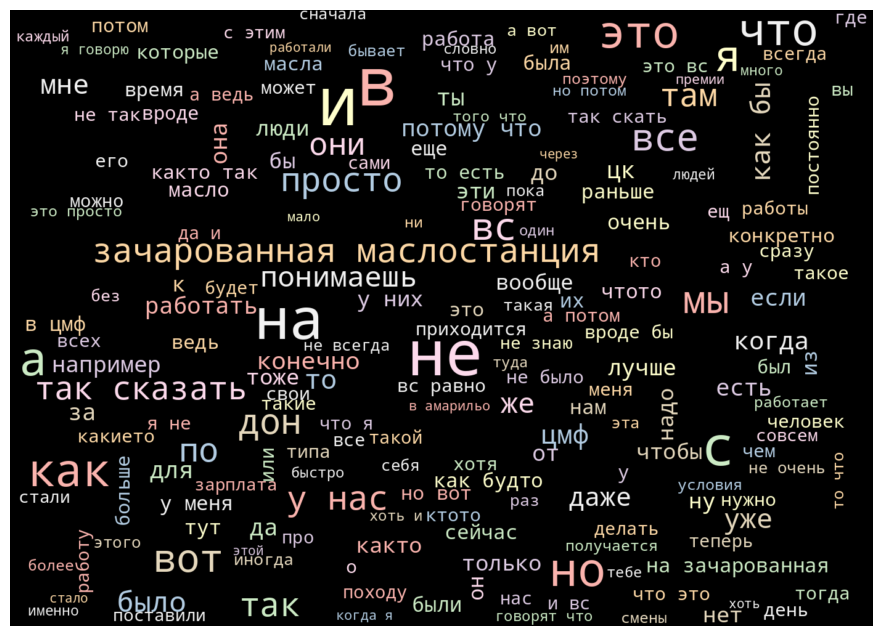

In [ ]:
text = ' '.join(df['quote'].apply(lambda x: re.sub('[^–∞-—èa-z0-9 ]', '', x.lower())))
wordcloud = WordCloud(width=1400, height=1000, background_color ='black', colormap='Pastel1', max_font_size=110, collocations=True).generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

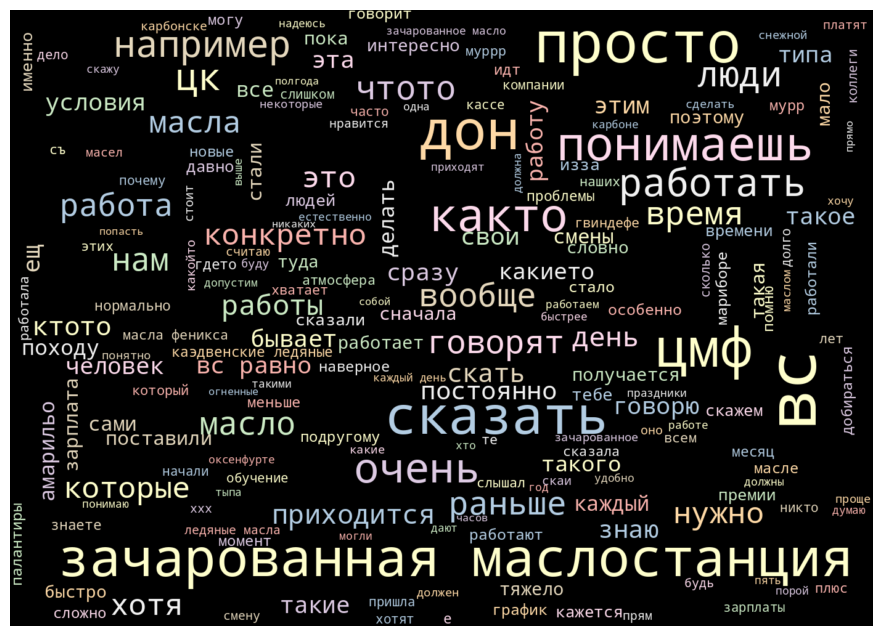

In [ ]:
# –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤
text = ' '.join(df['quote'].apply(lambda x: re.sub('[^–∞-—èa-z0-9 ]', '', x.lower())))
wordcloud = WordCloud(width=1400, height=1000, background_color ='black', colormap='Pastel1', stopwords = stop_words, max_font_size=110, collocations=True).generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

–û–±–ª–∞–∫–æ —Å–ª–æ–≤ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã–µ –≤ —Ä–∞–∑—Ä–µ–∑–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–π –≤–∞–∂–Ω–æ—Å—Ç–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å–ª–æ–≤ –≤ —Ç–µ–∫—Å—Ç–µ: —á–µ–º –∫—Ä—É–ø–Ω–µ–µ —Å–ª–æ–≤–æ –≤ –æ–±–ª–∞–∫–µ, —Ç–µ–º –≤–∞–∂–Ω–µ–µ –æ–Ω–æ (–∫—Ä—É–ø–Ω—ã–µ —Å–ª–æ–≤–∞ –º–æ–≥—É—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –∫–ª—é—á–µ–≤—ã–µ —Ç–µ–º—ã –∏–ª–∏ –∏–¥–µ–∏, –ª–∏–±–æ –Ω–∞ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞).

–ù–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å–ª–æ–≤–∞/–±–∏–≥—Ä–∞–º–º—ã –≤ –Ω–∞—à–∏—Ö —Ü–∏—Ç–∞—Ç–∞—Ö ‚Äî "–∑–∞—á–∞—Ä–æ–≤–∞–Ω–Ω–∞—è –º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏—è", "—Ü–º—Ñ" –≥–æ–≤–æ—Ä—è—Ç –æ –∫–æ–º–ø–∞–Ω–∏–∏ –∏ –µ–µ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, "—Å–∫–∞–∑–∞—Ç—å", "–ø—Ä–æ—Å—Ç–æ", "–ø–æ–Ω–∏–º–∞–µ—à—å" –Ω–µ –Ω–µ—Å—É—Ç –≤ —Å–µ–±–µ –±–æ–ª—å—à–æ–≥–æ —Å–º—ã—Å–ª–∞.

–ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —ç—Ç–æ, –¥—Ä—É–≥–∏–µ —Å–ª–æ–≤–∞ –∏–∑ –æ–±–ª–∞–∫–∞ (–º–µ–Ω–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ) –ø–æ–∑–≤–æ–ª—è—é—Ç –∏—Å—Ö–æ–¥—è –∏–∑ –∞–Ω–∞–ª–∏–∑–∞ –æ–±–ª–∞–∫–∞ –≤—ã–¥–µ–ª–∏—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ç–µ–º—ã: –Ω–∞–ø—Ä–∏–º–µ—Ä, —É—Å–ª–æ–≤–∏—è —Ç—Ä—É–¥–∞ (–≥—Ä–∞—Ñ–∏–∫ —Ä–∞–±–æ—Ç—ã, –∑–∞—Ä–ø–ª–∞—Ç–∞ –∏ –ø—Ä–µ–º–∏–∏), –ø—Ä–∞–∑–¥–Ω–∏–∫–∏, —Ä–∞–±–æ—á–∞—è –∞—Ç–º–æ—Å—Ñ–µ—Ä–∞ –∏ –≤–∑–∞–∏–º–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –∫–æ–ª–ª–µ–≥–∞–º–∏, –æ–±—É—á–µ–Ω–∏–µ –∏ –∞–¥–∞–ø—Ç–∞—Ü–∏—è –Ω–æ–≤—ã—Ö —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤, —É–¥–æ–±—Å—Ç–≤–æ –¥–æ–±–∏—Ä–∞—Ç—å—Å—è –¥–æ —Ä–∞–±–æ—Ç—ã.

–¢–∞–∫–∂–µ –≤–∏–¥–∏–º —Å–ª–æ–≤–∞-–ø–∞—Ä–∞–∑–∏—Ç—ã ‚Äî "–¥–æ–Ω", "—Ü–∫", "–º—É—Ä—Ä—Ä", "—Ç—ã–ø–∞", "–ø–æ—Ö–æ–¥—É", "—Ç–∏–ø–∞", "—Ç–∞–∫ —Å–∫–∞—Ç—å", "–Ω–æ –≤–æ—Ç", "–∫–∞–∫ –±—ã". –û–Ω–∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É—é—Ç —Ä–∞–±–æ—Ç–Ω–∏–∫–æ–≤ –Ω–∏–∑–∫–æ–≥–æ –∏ —Å—Ä–µ–¥–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞–±–æ—Ç–Ω–∏–∫–∏ –ó–ú–°). –°–ª–æ–≤–∞-–ø–∞—Ä–∞–∑–∏—Ç—ã –º–æ–≥—É—Ç –¥–∞—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ –∫—É–ª—å—Ç—É—Ä–Ω–æ–º –∏ —Ä–µ–≥–∏–æ–Ω–∞–ª—å–Ω–æ–º –±—ç–∫–≥—Ä–∞—É–Ω–¥–µ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤, —É–∫–∞–∑–∞—Ç—å –Ω–∞ –Ω–µ—É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å/–Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ–±—Å—É–∂–¥–∞–µ–º—ã—Ö –≤–æ–ø—Ä–æ—Å–æ–≤.

In [1]:
# print(df[df['quote'].str.contains('–¥–æ–±–∏—Ä–∞—Ç—å—Å—è')]['quote'].values)

#### –°–æ–∑–¥–∞–Ω–∏–µ –∫–∞—Å—Ç–æ–º–Ω–æ–≥–æ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏—Å—Ö–æ–¥–Ω—ã—Ö —Ü–∏—Ç–∞—Ç, –∞ –∏–º–µ–Ω–Ω–æ:
1. –ø—Ä–∏–≤–æ–¥–∏—Ç –≤—Å–µ —Å–ª–æ–≤–∞ —Ü–∏—Ç–∞—Ç—ã –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
2. —É–¥–∞–ª—è–µ—Ç –≤—Å–µ –º—É—Å–æ—Ä–Ω—ã–µ —Å–ª–æ–≤–∞, –≤ —Ç.—á. –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é
3. —Ä–∞–∑–±–∏–≤–∞–µ—Ç —Ü–∏—Ç–∞—Ç—É –Ω–∞ —Ç–æ–∫–µ–Ω—ã (—Å–ª–æ–≤–∞)
4. —É–±–∏—Ä–∞–µ—Ç —Å–ª–æ–≤–∞-—á–∏—Å–ª–∞
5. –∏—Å–ø—Ä–∞–≤–ª—è–µ—Ç –æ–ø–µ—á–∞—Ç–∫–∏ –≤ —Å–ª–æ–≤–∞—Ö
6. —É–¥–∞–ª—è–µ—Ç —Ü–∏—Ñ—Ä—ã –∏–∑ —Å–ª–æ–≤
7. –ø—Ä–æ–≤–æ–¥–∏—Ç –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é —Å–ª–æ–≤
8. —É–±–∏—Ä–∞–µ—Ç —Å—Ç–æ–ø-—Å–ª–æ–≤–∞

–ö–ª—é—á–µ–≤–æ–π –∑–∞–¥–∞—á–µ–π –∫–∞—Å—Ç–æ–º–Ω–æ–≥–æ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ —è–≤–ª—è–µ—Ç—Å—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞ –∏ –∏–∑–±–∞–≤–ª–µ–Ω–∏–µ –µ–≥–æ –æ—Ç –º—É—Å–æ—Ä–∞ —Å –ø–æ—Å–ª–µ–¥—É—é—â–µ–π —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–µ–π.

–ü–æ—Å–∫–æ–ª—å–∫—É —Ç–µ–∫—Å—Ç—ã —Ü–∏—Ç–∞—Ç —Å–æ–¥–µ—Ä–∂–∞—Ç –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –æ—à–∏–±–æ–∫, –±–µ–∑ –∏—Ö –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Ç—É—Ç –Ω–µ –æ–±–æ–π—Ç–∏—Å—å, –ø–æ—Ç–æ–º—É —á—Ç–æ —ç—Ç–∏ –æ—à–∏–±–∫–∏ –≤–Ω–æ—Å—è—Ç –æ—á–µ–Ω—å –º–Ω–æ–≥–æ —à—É–º–∞ –≤ –¥–∞–Ω–Ω—ã–µ –∏ –º–æ–≥—É—Ç –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ —Å–∫–∞–∑–∞—Ç—å—Å—è –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞—Ö –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞ –¥–ª—è —ç—Ç–æ–≥–æ SpellChecker.

–¶–∏—Ñ—Ä—ã —Ä–µ—à–∏–ª–∞ —É–¥–∞–ª—è—Ç—å –∏–∑ —Å–ª–æ–≤ —É–∂–µ –ø–æ—Å–ª–µ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏—è –æ–ø–µ—á–∞—Ç–æ–∫, —Ç.–∫. –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ü–∏—Ñ—Ä—ã –∑–∞–º–µ–Ω—è—é—Ç –±—É–∫–≤—ã –≤ —Å–ª–æ–≤–∞—Ö, –∏ SpellChecker –ª—É—á—à–µ –ø–æ–Ω–∏–º–∞–µ—Ç, –∫–∞–∫ –∏—Å–ø—Ä–∞–≤–∏—Ç—å —Ç–∞–∫–æ–µ —Å–ª–æ–≤–æ —Å —Ü–∏—Ñ—Ä–æ–π, —á–µ–º –±–µ–∑ –Ω–µ–µ. –ù–∞–ø—Ä–∏–º–µ—Ä, —Å–ª–æ–≤–æ "—Å–∫–∞3—Ç—å" –ø—Ä–∞–≤–∏–ª—å–Ω–æ —Ä–∞—Å–ø–æ–∑–Ω–∞–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ —Å —Ü–∏—Ñ—Ä–æ–π.

–õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è ‚Äî –ø—Ä–æ—Ü–µ—Å—Å –ø—Ä–∏–≤–µ–¥–µ–Ω–∏—è —Å–ª–æ–≤–∞ –∫ –µ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ (–ª–µ–º–º–µ):
- –¥–ª—è —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö ‚Äî –∏–º–µ–Ω–∏—Ç–µ–ª—å–Ω—ã–π –ø–∞–¥–µ–∂, –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ —á–∏—Å–ª–æ;
- –¥–ª—è –ø—Ä–∏–ª–∞–≥–∞—Ç–µ–ª—å–Ω—ã—Ö ‚Äî –∏–º–µ–Ω–∏—Ç–µ–ª—å–Ω—ã–π –ø–∞–¥–µ–∂, –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ —á–∏—Å–ª–æ, –º—É–∂—Å–∫–æ–π —Ä–æ–¥;
- –¥–ª—è –≥–ª–∞–≥–æ–ª–æ–≤, –ø—Ä–∏—á–∞—Å—Ç–∏–π, –¥–µ–µ–ø—Ä–∏—á–∞—Å—Ç–∏–π ‚Äî –≥–ª–∞–≥–æ–ª –≤ –∏–Ω—Ñ–∏–Ω–∏—Ç–∏–≤–µ.

–í –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ —Ä–µ—à–∏–ª–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏–º–µ–Ω–Ω–æ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é, –∞ –Ω–µ —Å—Ç–µ–º–º–∏–Ω–≥, —Ç.–∫.

1) –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è –ø–æ–∑–≤–æ–ª—è–µ—Ç —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–∞–∫ –æ—Ç–¥–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –∫–∞–∂–¥–æ–µ —Å–ª–æ–≤–æ, –∞ –Ω–µ –∫–∞–∂–¥—É—é –µ–≥–æ –æ—Ç–¥–µ–ª—å–Ω—É—é —Ñ–æ—Ä–º—É,

2) –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ —Å—Ç–æ—è—Ç —Ç–æ–ª—å–∫–æ –≤ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ, –∏ –±–µ–∑ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏ –≤—ã–∫–∏–¥—ã–≤–∞–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ –æ–Ω–∞,

3) —Å—Ç–µ–º–º–∏–Ω–≥ –±–æ–ª–µ–µ "–≥—Ä—É–±–æ" –æ–±—Ä—É–±–∞–µ—Ç —Å–ª–æ–≤–∞, —É–±–∏—Ä–∞—è –∞—Ñ—Ñ–∏–∫—Å—ã (–æ–∫–æ–Ω—á–∞–Ω–∏—è –∏ —Å—É—Ñ—Ñ–∏–∫—Å—ã),

4) –∞ —Ç–∞–∫–∂–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏ –±–æ–ª–µ–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–µ, —á—Ç–æ –≤–∞–∂–Ω–æ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –≤—ã–¥–µ–ª–µ–Ω–∏—è –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤.  

–°—Ç–æ–ø-—Å–ª–æ–≤–∞ ‚Äî —ç—Ç–æ —Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤ –ª—é–±–æ–º —Ç–µ–∫—Å—Ç–µ –∏ –Ω–∏—á–µ–≥–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–≥–æ –Ω–µ –≥–æ–≤–æ—Ä—è—Ç –æ –∫–æ–Ω—Ä–µ—Ç–Ω–æ–º –¥–æ–∫—É–º–µ–Ω—Ç–µ, —Ç.–µ. –∏–≥—Ä–∞—é—Ç —Ä–æ–ª—å —à—É–º–∞, –ø–æ—ç—Ç–æ–º—É –∏—Ö —É–±–∏—Ä–∞—é. –ü—É–Ω–∫—Ç—É–∞—Ü–∏—è (–∏ –¥—Ä—É–≥–æ–π –º—É—Å–æ—Ä, –∞ —Ç–∞–∫–∂–µ —á–∏—Å–ª–∞) —Ç–∞–∫–∂–µ –Ω–µ –Ω–µ—Å–µ—Ç –≤ —Å–µ–±–µ –Ω–∏–∫–∞–∫–æ–≥–æ —Å–º—ã—Å–ª–∞ (–∑–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª—É—á–∞–µ–≤ –ø–æ —Ç–∏–ø—É "–∫–∞–∑–Ω–∏—Ç—å –Ω–µ–ª—å–∑—è –ø–æ–º–∏–ª–æ–≤–∞—Ç—å" –∏ —Å–º–∞–π–ª–∏–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ–± —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–º –æ–∫—Ä–∞—Å–µ —Ñ—Ä–∞–∑—ã, –æ–¥–Ω–∞–∫–æ —ç—Ç–æ —Å–≤–æ–π—Å—Ç–≤–æ –±–æ–ª–µ–µ –∞–∫—Ç—É–∞–ª—å–Ω–æ, –Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è –∑–∞–¥–∞—á–∏ –∞–Ω–∞–ª–∏–∑–∞ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ —Ç–µ–∫—Å—Ç–∞ –∏ —Å–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–∏—Ö —Ç–µ–∫—Å—Ç–æ–≤, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Ç–≤–∏—Ç–æ–≤).

In [ ]:
stop_words = stopwords.words('russian')
spell = SpellChecker(language='ru')
pymorphy2_analyzer = MorphAnalyzer()

In [ ]:
# –≤ —Å–ø–∏—Å–∫–µ —Å—Ç–æ–ø-—Å–ª–æ–≤ –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –Ω–µ—Ç –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å—Ç–æ–ø-—Å–ª–æ–≤ —Å–ª–æ–≤, –∞ –≤ —Ü–∏—Ç–∞—Ç–∞—Ö –æ–Ω–∏ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –¥–æ–≤–æ–ª—å–Ω–æ —á–∞—Å—Ç–æ,
# –ø–æ—ç—Ç–æ–º—É –¥–æ–±–∞–≤–ª—é —ç—Ç–∏ —Å–ª–æ–≤–∞ –≤ —Å–ø–∏—Å–æ–∫
stop_words += ['–≤—Å—ë', '—ç—Ç–æ', '—Å–≤–æ–π', '–≤–µ—Å—å', '–≤—Ä–æ–¥–µ', '–µ—â—ë', '–Ω–∞—à']

–í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

In [ ]:
def word_is_digit(word: str) -> bool:
    # –ü—Ä–æ–≤–µ—Ä–∫–∞, —Å–æ–¥–µ—Ä–∂–∏—Ç –ª–∏ —Å–ª–æ–≤–æ —Ç–æ–ª—å–∫–æ —Ü–∏—Ñ—Ä—ã
    return word.isdigit()

def contains_digit(word: str) -> bool:
    # –ü—Ä–æ–≤–µ—Ä–∫–∞, —Å–æ–¥–µ—Ä–∂–∏—Ç –ª–∏ —Å–ª–æ–≤–æ —Ü–∏—Ñ—Ä—ã
    return any(map(str.isdigit, word))

def delete_digits_in_word(word: str) -> str:
    # –£–¥–∞–ª–µ–Ω–∏–µ —Ü–∏—Ñ—Ä –≤–Ω—É—Ç—Ä–∏ —Å–ª–æ–≤–∞ –ª–∏–±–æ –ø–æ –∫—Ä–∞—è–º —Å–ª–æ–≤–∞
    if contains_digit(word) and not word_is_digit(word):
      filtered_characters = filter(lambda x: not x.isdigit(), word)
      return ''.join(filtered_characters)
    else:
      return word

def correct_spelling(word: str) -> str:
    # –ò—Å–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –æ–ø–µ—á–∞—Ç–æ–∫ –≤ —Å–ª–æ–≤–µ
    corrected_word = spell.correction(word)
    return corrected_word if corrected_word else word

–ö–∞—Å—Ç–æ–º–Ω—ã–π —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä

In [ ]:
def custom_tokenizer(s: str) -> List[str]:
    # –ö–∞—Å—Ç–æ–º–Ω—ã–π —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä

    # –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫–∏ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    s = s.lower()
    # —É–¥–∞–ª–µ–Ω–∏–µ –≤—Å–µ—Ö –º—É—Å–æ—Ä–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤, –≤ —Ç.—á. –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏
    s = re.sub('[^–∞-—èa-z0-9 ]', '', s)
    # —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Å—Ç—Ä–æ–∫–∏ –Ω–∞ —Å–ª–æ–≤–∞
    s = word_tokenize(s)

    mask = list(map(word_is_digit, s))
    # –º–∞—Å–∫–∞, –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∞—è —Å–ª–æ–≤–∞ –∏–∑ —Å–ø–∏—Å–∫–∞, —Å–æ—Å—Ç–æ—è—â–∏–µ —Ç–æ–ª—å–∫–æ –∏–∑ —Ü–∏—Ñ—Ä
    s = np.array(s)[np.where(np.array(mask)==0)].tolist()
    # –æ—Å—Ç–∞–≤–ª—è—é —Å–ø–∏—Å–æ–∫ –∏–∑ —Å–ª–æ–≤, –Ω–µ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—â–∏—Ö —É—Å–ª–æ–≤–∏—é (–º–∞—Å–∫–µ), —Ç.–µ. —Å–ª–æ–≤ –Ω–µ —Å–æ—Å—Ç–æ—è—â–∏—Ö —Ç–æ–ª—å–∫–æ –∏–∑ —Ü–∏—Ñ—Ä

    # –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –æ–ø–µ—á–∞—Ç–æ–∫ –≤ —Å–ª–æ–≤–∞—Ö
    s = [correct_spelling(word) for word in s]

    # —É–¥–∞–ª–µ–Ω–∏–µ —Ü–∏—Ñ—Ä –≤–Ω—É—Ç—Ä–∏ —Å–ª–æ–≤
    s = [delete_digits_in_word(word) for word in s]

    # –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è —Å–ª–æ–≤
    s = [pymorphy2_analyzer.parse(word)[0].normal_form for word in s]

    # –ø—Ä–æ–≤–µ—Ä–∫–∞, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —Å–ª–æ–≤–æ —Å—Ç–æ–ø-—Å–ª–æ–≤–æ–º
    def is_a_stop_word(w: str):
      return w in stop_words

    stop_word_mask = list(map(is_a_stop_word, s))
    # –ø—Ä–∏–º–µ–Ω—è—é –º–∞—Å–∫—É –∫–æ –≤—Å–µ–º—É —Å–ø–∏—Å–∫—É, —á—Ç–æ–±—ã –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å, –∫–∞–∫–∏–µ —Å–ª–æ–≤–∞ –∏–∑ —Å–ø–∏—Å–∫–∞ —è–≤–ª—è—é—Ç—Å—è —Å—Ç–æ–ø-—Å–ª–æ–≤–∞–º–∏
    s = np.array(s)[np.where(np.array(stop_word_mask)==0)].tolist()
    # –æ—Å—Ç–∞–≤–ª—è—é —Ç–æ–ª—å–∫–æ —Å–ª–æ–≤–∞, –Ω–µ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—â–∏–µ —É—Å–ª–æ–≤–∏—é (–º–∞—Å–∫–µ), —Ç.–µ. —Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ —è–≤–ª—è—é—Ç—Å—è —Å—Ç–æ–ø-—Å–ª–æ–≤–∞–º–∏
    return s

–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∫–∞—Å—Ç–æ–º–Ω–æ–≥–æ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ –∫ –ø–µ—Ä–≤—ã–º –¥–≤—É–º —Ü–∏—Ç–∞—Ç–∞–º –¥–ª—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞

In [ ]:
print(df['quote'][:2].apply(custom_tokenizer).tolist())

[['—Å—Ä–µ–¥–∏', '–Ω–æ—á—å', '—Ä–∞–π–æ–Ω', '—á–∞—Å', '—É–ø–∞—Å—Ç—å', '–ø–æ–ª', '–≤–æ–¥–∞', '—Å—Ç—Ç–µ–∫–ª—è—Ç—å', '—Ç–∞—Ä–∞', '—Ç–æ–±—ã—Ç—å', '–ø–æ—Å—Ä–µ–¥–∏', '–ª—É–Ω–∞', '—Å—Ç–µ–∫–ª–æ', '—É—Ç—Ä–æ', '–∫—Å—Ç–∞—Ç–∏', '–ø–µ—Ä–≤—ã–π', '–ø–∞–¥–∞—Ç—å', '–∫–∞—Ç–æ', '–Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ', '—Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—Ç—å', '–¥–æ–ª–∂–Ω—ã–π', '–∑–∞—Å—Ç–∞–≤–ª—è—Ç—å', '–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ', '–∫–∞—Ä—Ç–∏–Ω–∫–∞', '–ø–∞—Ä–∞', '–≥—Ä–æ—Ö–∞—Ç—å—Å—è', '–ø–æ–ª–∫–∞', '–±—É—Ç—Ç—ã–ª–∫–∞'], ['–ø—Ä–æ–≥—Ä–∞–º–º–∞', '–ø–æ–≤—ã—à–µ–Ω–∏–µ', '–∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è', '–≥–∏–ª—å–¥–∏—è', '—Ö–∏—Ç—Ä—ã–π', '—Ö–∏—Ç—Ä—ã–π', '—Ö–æ—Ç–µ—Ç—å', '–ø–æ–ø—ã—Ç–∞—Ç—å—Å—è', '–ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–µ', '–Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ', '–≥–∏–ª—å–¥–∏—è', '–≥–∏–ª—å–¥–∏—è', '—Ç–æ–ª–∫–∞—Ç—å', '–Ω—É–∂–Ω–æ', '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', '–±–µ–ª—ã–π', '–∑–º–µ—è', '–Ω–∞–ø—Ä–∏–º–µ—Ä', '–ø—Ä–æ–≥—Ä–∞–º–º–∞', '–≥–∏–±–±—Å', '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', '–≤—ã–±–∏—Ä–∞—Ç—å', '–Ω—É–∂–Ω–æ']]


In [ ]:
# # —á—Ç–æ–±—ã –Ω–µ –∂–¥–∞—Ç—å –ø–æ–∫–∞ –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –æ–±—Ä–∞–±–æ—Ç–∞—é—Ç—Å—è, –º–æ–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ —Å—á–∏—Ç–∞—Ç—å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –ª–µ–∂–∞—Ç –Ω–∞ –≥–∏—Ç—Ö–∞–±–µ
# # –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ –∫ –¥–∞–Ω–Ω—ã–º
# df['tokens'] = df['quote'].apply(custom_tokenizer)

# # –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–∫–µ–Ω–æ–≤ –æ–±—Ä–∞—Ç–Ω–æ –≤ —Å—Ç—Ä–æ–∫–∏
# df['processed_quote'] = df['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
# df = df.drop(['tokens'], axis=1)

In [ ]:
# df.to_csv('df_preprocessed.csv', index=False)

In [ ]:
df_preprocessed = pd.read_csv('df_preprocessed.csv')

In [ ]:
df_preprocessed.head()

id                                              quote  \
0   0  ¬´–£ –Ω–Ω–∞—Å —Å—Ä–µ–¥–∏ –Ω–æ—ái –≤ —Ä–∞–π–æ–æ–Ω–µ 55 —á–∞—Å–æ–≤ —É–ø–∞–ª–∞ –ø–æ...   
1   1  –ü—Ä–æ–≥—Ä–∞–º–º—ã –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ —á–µ—Ä–µ–∑ –≥–∏–ª—å–¥–∏—é...   
2   2  "–ú—É—Ä—Ä... –ù–æ–≤–∏–≥—Ä–∞–¥ - –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–æ–≤, –¥–∞. –ù–æ –≤...   
3   3  –¢–∏–ø–∞, –≤–æ—Ç —É–∂–µ –ø–æ–ª–≥–æ–¥–∞, –∫–∞–∫ –º—ã –∂–¥–µ–º —É—Å—Ç–∞–Ω–æ–≤–∫–∏ —ç...   
4   4  "–¢–µ–ø–µ—Ä—å –≤—Å—å—ë —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ! –†–∞–Ω—å—à–µ –±—É–º–∞–∂–∫–∏ –ª–µ—Ç–∞–ª–∏...   

                                     processed_quote  
0  —Å—Ä–µ–¥–∏ –Ω–æ—á—å —Ä–∞–π–æ–Ω —á–∞—Å —É–ø–∞—Å—Ç—å –ø–æ–ª –≤–æ–¥–∞ —Å—Ç—Ç–µ–∫–ª—è—Ç—å...  
1  –ø—Ä–æ–≥—Ä–∞–º–º–∞ –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è –≥–∏–ª—å–¥–∏—è —Ö–∏—Ç—Ä—ã...  
2  –º—É—Ä –Ω–æ–≤–∏–≥—Ä–∞–¥ –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å –º–∞—Å–ª–æ—Å—Ç...  
3  —Ç–∏–ø –ø–æ–ª–≥–æ–¥–∞ –∂–¥–∞—Ç—å —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ñ–∏–ª—å–º –º–∞—Å–ª–æ–±–∞–∑–∞ –¥...  
4  –ø—Ä–æ—Å—Ç–æ —Ä–∞–Ω–Ω–∏–π –±—É–º–∞–≥–∞ –¥–µ—Ç–∞–ª—å —Ç–µ—Ä—è—Ç—å—Å—è –∏—Å–∫–∞—Ç—å –ø—Ä...

#### EDA –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ç–µ–ø–µ—Ä—å –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É —Å–ª–æ–≤ –∏–∑ —É–∂–µ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —Ü–∏—Ç–∞—Ç.

In [ ]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–ª–æ–≤–∞—Ä—è —Å–ª–æ–≤
def vocabulary_preprocessed(quotes):
    words = []
    for quote in quotes:
        words += word_tokenize(quote)
    return words

In [ ]:
words = set(vocabulary_preprocessed(df_preprocessed['processed_quote']))
len(words)

# –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ —Å–æ–∫—Ä–∞—Ç–∏–ª–æ—Å—å –±–æ–ª–µ–µ —á–µ–º –≤ 2 —Ä–∞–∑–∞

4554

In [ ]:
counter = Counter(vocabulary_preprocessed(df_preprocessed['processed_quote']))
most_common_words = counter.most_common(20)  # —Ç–æ–ø-20 —Å–ª–æ–≤
print(most_common_words)

[('—Å–∫–∞–∑–∞—Ç—å', 293), ('—Ä–∞–±–æ—Ç–∞—Ç—å', 278), ('–º–∞—Å–ª–æ', 258), ('–∑–∞—á–∞—Ä–æ–≤–∞—Ç—å', 245), ('–ø—Ä–æ—Å—Ç–æ', 235), ('–≥–æ–≤–æ—Ä–∏—Ç—å', 222), ('–ø–æ–Ω–∏–º–∞—Ç—å', 216), ('–º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏—è', 203), ('–¥–æ–Ω', 195), ('—á–µ–ª–æ–≤–µ–∫', 185), ('—Ä–∞–±–æ—Ç–∞', 177), ('–º–æ—á—å', 151), ('—Ö–æ—Ä–æ—à–∏–π', 146), ('–∫–∞—Ç–æ', 132), ('—Å—Ç–∞—Ç—å', 128), ('–∑–Ω–∞—Ç—å', 120), ('–æ—á–µ–Ω—å', 119), ('–≤—Ä–µ–º—è', 110), ('–∫–æ—Ç–æ—Ä—ã–π', 105), ('–Ω–æ–≤—ã–π', 97)]


In [ ]:
df_most_common = pd.DataFrame(most_common_words, columns=['–°–ª–æ–≤–æ', '–ß–∞—Å—Ç–æ—Ç–∞'])

fig = px.bar(df_most_common, y='–°–ª–æ–≤–æ', x='–ß–∞—Å—Ç–æ—Ç–∞', color_discrete_sequence=['#7BECF7'], orientation='h', title='–¢–æ–ø-20 —Å–ª–æ–≤')

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    width=1300,
    height=500,
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(color='#FFFFFF')
)

fig.update_xaxes(showline=True, linewidth=2, linecolor='white', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='white')

fig.show()

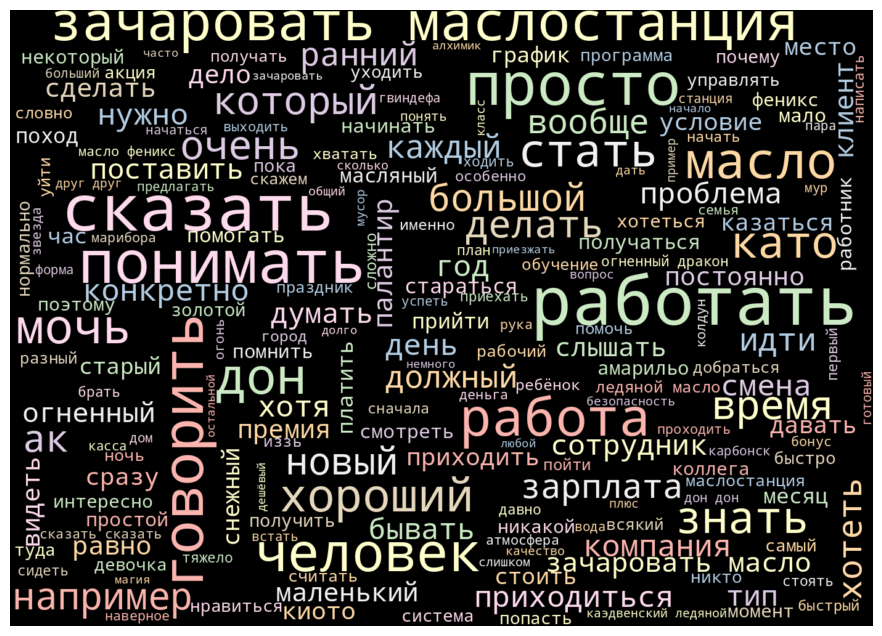

In [ ]:
text = ' '.join(df_preprocessed['processed_quote'])
wordcloud = WordCloud(width=1400, height=1000, background_color ='black', colormap='Pastel1', max_font_size=110, collocations=True).generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —á–∞—Å—Ç–æ—Ç–∞ —Å–ª–æ–≤ –Ω–µ–º–Ω–æ–≥–æ "–≤—ã—Ä–æ–≤–Ω—è–ª–∞—Å—å" ‚Äî –≤ –æ–±–ª–∞–∫–µ –±–æ–ª—å—à–µ –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã—Ö —Å–ª–æ–≤.

–û–¥–Ω–∞–∫–æ –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–µ –≤—Å–µ —Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å–ª–æ–≤–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã. –ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —ç—Ç–æ, –ø–æ –º–µ–Ω–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–º —Å–ª–æ–≤–∞–º –≤—Å–µ –µ—â–µ –º–æ–∂–Ω–æ —Å—É–¥–∏—Ç—å –æ —Ç–µ–º–∞—Ö. –í –æ–±—â–µ–º –∏ —Ü–µ–ª–æ–º, —Ç–µ–º—ã —Å–æ—Ö—Ä–∞–Ω–∏–ª–∏—Å—å. –¢–∞–∫–∂–µ –º–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å —Å–ª–æ–≤–∞ "–∞–ª—Ö–∏–º–∏–∫" (—Ä–∞–±–æ—Ç–∞ —Å –º–∞—Å–ª–æ–º ‚Äî –∑–∞—â–∏—Ç–∞ –æ—Ç –∑–∞–ø–∞—Ö–∞, –æ–±—É—á–µ–Ω–∏–µ, –∫–∞—á–µ—Å—Ç–≤–æ –º–∞—Å–ª–∞), "–∫–ª–∏–µ–Ω—Ç", –∫–æ—Ç–æ—Ä—ã–µ –æ–ø–∏—Å—ã–≤–∞—é—Ç –ø–æ—Ä—Ç—Ä–µ—Ç—ã —Å–æ—Ü–∏–∞–ª—å–Ω—ã—Ö –≥—Ä—É–ø–ø. –ö–ª–∏–µ–Ω—Ç—ã —è–≤–ª—è—é—Ç—Å—è –≤–Ω–µ—à–Ω–∏–º–∏ —É—á–∞—Å—Ç–Ω–∏–∫–∞–º–∏ –∏–Ω—Ç–µ—Ä–≤—å—é, –æ–¥–Ω–∞–∫–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ü–∏—Ç–∞—Ç—ã –ø–æ–∑–≤–æ–ª—è—é—Ç –≤—ã—è–≤–∏—Ç—å —É–∑–∫–∏–µ –º–µ—Å—Ç–∞ –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –∑–∞—á–∞—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –º–∞—Å–ª–∞ (—Å–µ—Ä–≤–∏—Å, —Ü–µ–Ω—ã), –ø—Ä–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –≥–æ–≤–æ—Ä—è—Ç —Ä–∞–±–æ—Ç–Ω–∏–∫–∏ –ó–ú–°, –∫–æ—Ç–æ—Ä—ã–µ —É–∫–∞–∑—ã–≤–∞—é—Ç –≤ —Å–≤–æ–∏—Ö –∏–Ω—Ç–µ—Ä–≤—å—é –Ω–∞ —Ä—è–¥ —Å–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–∏—Ö –ø—Ä–æ–±–ª–µ–º: –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ —Å –∫–ª–∏–µ–Ω—Ç–∞–º–∏, —Ä–∞–±–æ—Ç–∞ –∑–∞ –∫–∞—Å—Å–æ–π, –∞–∫—Ü–∏–∏ –∏ —Å–∫–∏–¥–∫–∏, –ø—Ä–æ—Ö–æ–¥–∏–º–æ—Å—Ç—å.

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å –±–µ—Å—Å–º—ã—Å–ª–µ–Ω–Ω—ã–µ —Å–ª–æ–≤–∞ "–∫–∏–æ—Ç–æ", "–∫–∞—Ç–æ", "–∏–∑–∑—å", –∫–æ—Ç–æ—Ä—ã–µ —è–≤–ª—è—é—Ç—Å—è —Å–ª–µ–¥—Å—Ç–≤–∏–µ–º –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è SpellChecker –∫ —Å–ª–æ–≤–∞–º "–∫—Ç–æ-—Ç–æ", "–∫–∞–∫-—Ç–æ", "–∏–∑-–∑–∞" (–≤–æ–∑–º–æ–∂–Ω–æ, –∏–∑-–∑–∞ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ —É–¥–∞–ª–µ–Ω–∏—è –¥–µ—Ñ–∏—Å–æ–≤ –≤ —ç—Ç–∏—Ö —Å–ª–æ–≤–∞—Ö).

In [2]:
# print(df_preprocessed[df_preprocessed['processed_quote'].str.contains('–∞–ª—Ö–∏–º–∏–∫')]['quote'].values)

#### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–ª—è —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è

##### –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤

–î–ª—è –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ–ª—É—á–∏—Ç—å –æ–±—ä–µ–∫—Ç—ã –≤—ã–±–æ—Ä–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –æ–ø–∏—Å—ã–≤–∞—é—Ç—Å—è —á–∏—Å–ª–∞–º–∏, –∞ –Ω–µ —Å–ª–æ–≤–∞–º–∏, —Ç.–µ. –≤–µ–∫—Ç–æ—Ä–∏–∑–æ–≤–∞—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≤ —Ö–æ–¥–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ. –î–ª—è —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å, –Ω–∞–ø—Ä–∏–º–µ—Ä, Bag-of-words –∏–ª–∏ TF-IDF.

**Bag-of-words**

–ü—É—Å—Ç—å –∏–º–µ–µ—Ç—Å—è –∫–æ–ª–ª–µ–∫—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤ $D = \{d_i\}_{i=1}^l$ –∏ —Å–ª–æ–≤–∞—Ä—å –≤—Å–µ—Ö —Å–ª–æ–≤, –≤—Å—Ç—Ä–µ—á–∞—é—â–∏—Ö—Å—è –≤ –≤—ã–±–æ—Ä–∫–µ $V = \{v_j\}_{j=1}^d.$ –í —ç—Ç–æ–º —Å–ª—É—á–∞–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã–π —Ç–µ–∫—Å—Ç $d_i$ –æ–ø–∏—Å—ã–≤–∞–µ—Ç—Å—è –≤–µ–∫—Ç–æ—Ä–æ–º $(x_{ij})_{j=1}^d,$ –≥–¥–µ
$$x_{ij} = \sum_{v \in d_i} [v = v_j].$$

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Ç–µ–∫—Å—Ç $d_i$ –æ–ø–∏—Å—ã–≤–∞–µ—Ç—Å—è –≤–µ–∫—Ç–æ—Ä–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤—Ö–æ–∂–¥–µ–Ω–∏–π –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞ –∏–∑ —Å–ª–æ–≤–∞—Ä—è –≤ –¥–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç.

**TF-IDF**

–ï—Å–ª–∏ —Å–ª–æ–≤–æ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –æ–¥–Ω–æ–º —Ç–µ–∫—Å—Ç–µ, –Ω–æ –ø–æ—á—Ç–∏ –Ω–µ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –¥—Ä—É–≥–∏—Ö, —Ç–æ –æ–Ω–æ –ø–æ–ª—É—á–∞–µ—Ç –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ –±–æ–ª—å—à–æ–π –≤–µ—Å, —Ä–æ–≤–Ω–æ —Ç–∞–∫ –∂–µ, –∫–∞–∫ –∏ —Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤ –∫–∞–∂–¥–æ–º —Ç–µ–∫—Å—Ç–µ. –î–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã —Ä–∞–∑–¥–µ–ª—è—Ç—å —Ç–∞–∫–∏–µ —Å–ª–æ–≤–∞, –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫—É—é –º–µ—Ä—É TF-IDF, —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É—é—â—É—é –≤–∞–∂–Ω–æ—Å—Ç—å —Å–ª–æ–≤–∞ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞. –î–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞ –∏–∑ —Ç–µ–∫—Å—Ç–∞ $d$ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏ –≤ –Ω–µ–º (Term Frequency):
$$
\text{TF}(t, d) = \frac{C(t | d)}{\sum\limits_{k \in d}C(k | d)},
$$
–≥–¥–µ $C(t | d)$ - —á–∏—Å–ª–æ –≤—Ö–æ–∂–¥–µ–Ω–∏–π —Å–ª–æ–≤–∞ $t$ –≤ —Ç–µ–∫—Å—Ç $d$.

–¢–∞–∫–∂–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞ –∏–∑ —Ç–µ–∫—Å—Ç–∞ $d$ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –æ–±—Ä–∞—Ç–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏ –≤ –∫–æ—Ä–ø—É—Å–µ —Ç–µ–∫—Å—Ç–æ–≤ $D$ (Inverse Document Frequency):
$$
\text{IDF}(t, D) = \log\left(\frac{|D|}{|\{d_i \in D \mid t \in d_i\}|}\right)
$$
–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –∑–¥–µ—Å—å –ø—Ä–æ–≤–æ–¥–∏—Ç—Å—è —Å —Ü–µ–ª—å—é —É–º–µ–Ω—å—à–∏—Ç—å –º–∞—Å—à—Ç–∞–± –≤–µ—Å–æ–≤, —Ç.–∫. –∑–∞—á–∞—Å—Ç—É—é –≤ –∫–æ—Ä–ø—É—Å–∞—Ö –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –æ—á–µ–Ω—å –º–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–æ–≤.

–í –∏—Ç–æ–≥–µ –∫–∞–∂–¥–æ–º—É —Å–ª–æ–≤—É $t$ –∏–∑ —Ç–µ–∫—Å—Ç–∞ $d$ —Ç–µ–ø–µ—Ä—å –º–æ–∂–Ω–æ –ø—Ä–∏—Å–≤–æ–∏—Ç—å –≤–µ—Å:
$$
\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
$$
–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ñ–æ—Ä–º—É–ª—ã –≤—ã—à–µ: —á–µ–º —á–∞—â–µ –¥–∞–Ω–Ω–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –¥–∞–Ω–Ω–æ–º —Ç–µ–∫—Å—Ç–µ –∏ —á–µ–º —Ä–µ–∂–µ –≤ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö, —Ç–µ–º –≤–∞–∂–Ω–µ–µ –æ–Ω–æ –¥–ª—è —ç—Ç–æ–≥–æ —Ç–µ–∫—Å—Ç–∞.

–í –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ –∫–∞–∂–µ—Ç—Å—è –±–æ–ª–µ–µ —Ä–∞–∑—É–º–Ω—ã–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å TF-IDF, —Ç.–∫. –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤—ã–¥–µ–ª–∏—Ç—å —Ç–µ–º–∞—Ç–∏–∫–∏ –∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ –Ω–∏—Ö, –ø–æ—ç—Ç–æ–º—É –Ω—É–∂–Ω–æ —á—Ç–æ–±—ã —É —Å–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤ —Ç–µ–∫—Å—Ç–∞—Ö, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö –æ–¥–Ω–æ–π —Ç–µ–º–∞—Ç–∏–∫–µ, –≤–µ—Å –±—ã–ª –±–æ–ª—å—à–∏–π.

–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä–∞ –≤–º–µ—Å—Ç–µ —Å –∫–∞—Å—Ç–æ–º–Ω—ã–º —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–æ–º

In [ ]:
tfidf_vec = TfidfVectorizer(min_df=15, max_df=0.8)
X = tfidf_vec.fit_transform(df_preprocessed['processed_quote'])

- `max_df` –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–∞ –º–∞—Ç—Ä–∏—Ü—ã –∑–∞ —Å—á–µ—Ç –æ—Ç–±—Ä–∞—Å—ã–≤–∞–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π df –±–ª–∏–∑–∫–∏—Ö –∫ –µ–¥–∏–Ω–∏—Ü–µ. –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, —Ç–∞–∫–∏–µ —Å–ª–æ–≤–∞ –Ω–µ –Ω–µ—Å—É—Ç –º–Ω–æ–≥–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, —Ç.–∫. –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —á–∞—Å—Ç–æ.
- `min_df` –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–∞ –º–∞—Ç—Ä–∏—Ü—ã —É–¥–∞–ª–µ–Ω–∏–µ–º —Å–ª–æ–≤ —Å–æ —Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫–∏–º df (–∏–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ —Å–ª–æ–≤, –≤—Ö–æ–¥—è—â–∏—Ö –º–µ–Ω—å—à–µ —á–µ–º –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤). –¢–∞–∫–∏–µ —Å–ª–æ–≤–∞ —Ç–æ–∂–µ –º–æ–≥—É—Ç –Ω–µ –Ω–µ—Å—Ç–∏ –≤ —Å–µ–±–µ –ø–æ–ª–µ–∑–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, —Ç.–∫. –ª–∏–±–æ —ç—Ç–æ —Å–ª–æ–≤–∞ —Å –æ–ø–µ—á–∞—Ç–∫–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –±—ã–ª–∏ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω—ã –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏, –ª–∏–±–æ —Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –≤—Ä—è–¥ –ª–∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É—é—Ç —Ç–µ–º—É, –æ–±—â—É—é –¥–ª—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ (–ø–æ—Å–∫–æ–ª—å–∫—É –Ω–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤–æ –≤—Å–µ—Ö –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ö –¥–∞–Ω–Ω–æ–π —Ç–µ–º—ã).

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–ª–æ–≤–∞—Ä—å, –ø–æ–ª—É—á–µ–Ω–Ω—ã–π –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏:

In [ ]:
print(tfidf_vec.vocabulary_)

{'–Ω–æ—á—å': 110, '—á–∞—Å': 219, '–ø–µ—Ä–≤—ã–π': 122, '–∫–∞—Ç–æ': 66, '–¥–æ–ª–∂–Ω—ã–π': 43, '–ø–∞—Ä–∞': 121, '–ø—Ä–æ–≥—Ä–∞–º–º–∞': 155, '—Ö–æ—Ç–µ—Ç—å': 214, '–Ω—É–∂–Ω–æ': 112, '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫': 191, '–Ω–∞–ø—Ä–∏–º–µ—Ä': 100, '–≥–æ—Ä–æ–¥': 29, '–∑–∞—á–∞—Ä–æ–≤–∞—Ç—å': 52, '–º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏—è': 89, '—á–µ–ª–æ–≤–µ–∫': 222, '–≥–æ—Ç–æ–≤—ã–π': 30, '–Ω–∏–∫—Ç–æ': 107, '–ø–æ–º–æ—á—å': 134, '–¥—Ä—É–≥': 47, '—Ä–∞–Ω–Ω–∏–π': 169, '—Ö–æ—Ä–æ—à–∏–π': 213, '—Ä–∞–±–æ—Ç–∞—Ç—å': 164, '—Ç–∏–ø': 202, '–∂–¥–∞—Ç—å': 50, '–¥—É–º–∞—Ç—å': 48, '–æ–≥–Ω–µ–Ω–Ω—ã–π': 115, '–æ–≥–æ–Ω—å': 116, '–¥–∞–≤–Ω–æ': 33, '–ø—Ä–æ—Å—Ç–æ': 158, '–∏—Å–∫–∞—Ç—å': 61, '–ø—Ä–∏—Ö–æ–¥–∏—Ç—å—Å—è': 153, '–º–µ—Å—Ç–æ': 92, '—Ä—É–∫–∞': 172, '—Å—Ç–∞—Ç—å': 197, '–º–æ—á—å': 96, '–∫–∏–æ—Ç–æ': 69, '–∫–æ–ª–ª–µ–≥–∞': 72, '–º–∞—Å–ª–æ': 88, '—Ä–∞–∑–Ω—ã–π': 168, '–¥—Ä–∞–∫–æ–Ω': 46, '–ø—Ä–æ—Å—Ç–æ–π': 159, '–¥–µ—à—ë–≤—ã–π': 40, '–≤—Ä–µ–º—è': 20, '–Ω–æ–≤—ã–π': 108, '—É—Ö–æ–¥–∏—Ç—å': 209, '—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—è': 201, '—Å—Ç–∞–Ω—Ü–∏—è': 194, '–ø–æ–ø–∞—Å

–ö–æ–Ω–µ—á–Ω–æ, –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤ —Å–ª–æ–≤–∞—Ä–µ –æ—Å—Ç–∞–ª–∏—Å—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å–ª–æ–≤–∞ —Å –æ–ø–µ—á–∞—Ç–∫–∞–º–∏ ('–æ—Ç—Ç–º–µ—á–∞—Ç—å', '—Å—Ç—Ç–µ–∫–ª—è—Ç—å'). –ù–æ –≤ –æ–±—â–µ–º –∏ —Ü–µ–ª–æ–º, –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å —Å–ª–æ–≤ –±—ã–ª–∞ –ø—Ä–∏–≤–µ–¥–µ–Ω–∞ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É –≤–∏–¥—É. –° —Ç–∞–∫–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏ —É–∂–µ –º–æ–∂–Ω–æ —Ä–∞–±–æ—Ç–∞—Ç—å.

##### –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è —Å—É–º–º–∞—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤

In [ ]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–¥–µ–ª–µ–Ω–∏—è –Ω–∞–∏–±–æ–ª–µ–µ "–∑–Ω–∞—á–∏–º—ã—Ö" –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –∏–∑ –≤—Å–µ—Ö –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π, –æ—Ç–Ω–æ—Å—è—â–∏—Ö—Å—è –∫ –æ–¥–Ω–æ–π —Ç–µ–º–µ
# –≠–∫—Å—Ç—Ä–∞–∫—Ç–∏–≤–Ω–∞—è —Å—É–º–º–∞—Ä–∏–∑–∞—Ü–∏—è
def summarize_topic(text, num_sentences=1):
    parser = PlaintextParser.from_string(text, Tokenizer("russian"))
    summarizer = LuhnSummarizer(Stemmer("russian"))
    summary = summarizer(parser.document, num_sentences)
    return ' '.join(str(sentence) for sentence in summary)

##### –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –ø—Ä–∏ –ø–æ–º–æ—â–∏ KMeans

–ü—Ä–∏–º–µ–Ω–∏–º —Å–Ω–∞—á–∞–ª–∞ KMeans –¥–ª—è –ø—Ä–æ—Å—Ç–æ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ (–Ω–∞—á–∞–ª—å–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö).

In [ ]:
# –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º KMeans
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# –ø–æ–ª—É—á–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
labels = kmeans.labels_

# –ø–æ–ª—É—á–µ–Ω–∏–µ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞
words = tfidf_vec.get_feature_names_out()
cluster_keywords = {}
for i in range(num_clusters):
    cluster_words = [words[ind] for ind in kmeans.cluster_centers_.argsort()[:, ::-1][i, :10]]
    cluster_keywords[i] = ', '.join(cluster_words)
    print(f"–ö–ª–∞—Å—Ç–µ—Ä {i + 1}: {', '.join(cluster_words)}")

# –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∏ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
df_topics_kmeans = df_preprocessed.copy()
df_topics_kmeans['cluster'] = labels
df_topics_kmeans['keywords'] = df_topics_kmeans['cluster'].map(cluster_keywords)

–ö–ª–∞—Å—Ç–µ—Ä 1: —É—Ö–æ–¥–∏—Ç—å, –≥–æ–¥, —Ä–∞–±–æ—Ç–∞, —Ö–æ—Ç–µ—Ç—å, –ø–æ—ç—Ç–æ–º—É, –º–µ—Å—Ç–æ, —Å—Ç–∞—Ç—å, –∏–∑–∑—å, –¥–∞–≤–Ω–æ, –∫–ª–∏–µ–Ω—Ç
–ö–ª–∞—Å—Ç–µ—Ä 2: –ø–æ–Ω–∏–º–∞—Ç—å, –º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏—è, –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å, —Ä–∞–±–æ—Ç–∞—Ç—å, —Ä–∞–±–æ—Ç–∞, –º–∞—Å–ª–æ, —á–µ–ª–æ–≤–µ–∫, –≤—Ä–µ–º—è, –∑–Ω–∞—Ç—å, –∫–∞–∂–¥—ã–π
–ö–ª–∞—Å—Ç–µ—Ä 3: –ø—Ä–æ—Å—Ç–æ, –º–∞—Å–ª–æ, —Å–∫–æ–ª—å–∫–æ, –ø–æ–ø–∞—Å—Ç—å, –≤–∏–¥–µ—Ç—å, –ø—Ä–æ–±–ª–µ–º–∞, —Ö–æ—Ç–µ—Ç—å, –∫–æ—Ç–æ—Ä—ã–π, –º–æ—á—å, —Ä–∞–±–æ—Ç–∞
–ö–ª–∞—Å—Ç–µ—Ä 4: –æ—Å—Ç–∞–ª—å–Ω–æ–π, –ø—Ä–∏–º–µ—Ä, –Ω–µ–º–Ω–æ–≥–æ, –Ω–∞—á–∏–Ω–∞—Ç—å, —Å—Ç–æ–∏—Ç—å, –∏–¥—Ç–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Å—Ç–∞—Ç—å, –æ—á–µ–Ω—å, –∫–æ—Ç–æ—Ä—ã–π
–ö–ª–∞—Å—Ç–µ—Ä 5: –∞–∫, –º–∞—Å–ª–æ, –ø—Ä–æ—Å—Ç–æ, –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å, –º–∞—Å–ª—è–Ω—ã–π, —Ä–∞–±–æ—Ç–∞, –ø–æ–º–æ—á—å, —Ö–æ—Ä–æ—à–∏–π, –Ω–∏–∫–∞–∫–æ–π, –Ω–∞–ø—Ä–∏–º–µ—Ä
–ö–ª–∞—Å—Ç–µ—Ä 6: —Å—Ç–∞—Ç—å, –ø—Ä–æ—Å—Ç–æ, –¥–µ–ª–∞—Ç—å, –ø–æ—Å—Ç–∞–≤–∏—Ç—å, –ø–æ—Ä–∞, —Ä–∞–±–æ—Ç–∞—Ç—å, —Ä–∞–±–æ—Ç–∞, –º–∞–ª–µ–Ω—å–∫–∏–π, –∑–∞—Ä–ø–ª–∞—Ç–∞, –Ω–æ–≤—ã–π
–ö–ª–∞—Å—Ç

In [ ]:
# —Å–æ–∑–¥–∞–Ω–∏–µ –∫—Ä–∞—Ç–∫–∏—Ö –æ–ø–∏—Å–∞–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞
cluster_summaries = {}
for cluster, group in df_topics_kmeans.groupby('cluster'):
    # –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö —Ç–µ–∫—Å—Ç–æ–≤ –≤ –≥—Ä—É–ø–ø–µ –≤ –æ–¥–∏–Ω –±–æ–ª—å—à–æ–π —Ç–µ–∫—Å—Ç
    cluster_text = ' '.join(group['quote'])
    # –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–∞ —Å—É–º–º–∞—Ä–∏–∑–∞—Ü–∏–∏
    cluster_summaries[cluster] = summarize_topic(cluster_text)
df_topics_kmeans['summary'] = df_topics_kmeans['cluster'].map(cluster_summaries)

In [ ]:
df_topics_kmeans.head()

id                                              quote  \
0   0  ¬´–£ –Ω–Ω–∞—Å —Å—Ä–µ–¥–∏ –Ω–æ—ái –≤ —Ä–∞–π–æ–æ–Ω–µ 55 —á–∞—Å–æ–≤ —É–ø–∞–ª–∞ –ø–æ...   
1   1  –ü—Ä–æ–≥—Ä–∞–º–º—ã –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ —á–µ—Ä–µ–∑ –≥–∏–ª—å–¥–∏—é...   
2   2  "–ú—É—Ä—Ä... –ù–æ–≤–∏–≥—Ä–∞–¥ - –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–æ–≤, –¥–∞. –ù–æ –≤...   
3   3  –¢–∏–ø–∞, –≤–æ—Ç —É–∂–µ –ø–æ–ª–≥–æ–¥–∞, –∫–∞–∫ –º—ã –∂–¥–µ–º —É—Å—Ç–∞–Ω–æ–≤–∫–∏ —ç...   
4   4  "–¢–µ–ø–µ—Ä—å –≤—Å—å—ë —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ! –†–∞–Ω—å—à–µ –±—É–º–∞–∂–∫–∏ –ª–µ—Ç–∞–ª–∏...   

                                     processed_quote  cluster  \
0  —Å—Ä–µ–¥–∏ –Ω–æ—á—å —Ä–∞–π–æ–Ω —á–∞—Å —É–ø–∞—Å—Ç—å –ø–æ–ª –≤–æ–¥–∞ —Å—Ç—Ç–µ–∫–ª—è—Ç—å...       16   
1  –ø—Ä–æ–≥—Ä–∞–º–º–∞ –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è –≥–∏–ª—å–¥–∏—è —Ö–∏—Ç—Ä—ã...       18   
2  –º—É—Ä –Ω–æ–≤–∏–≥—Ä–∞–¥ –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å –º–∞—Å–ª–æ—Å—Ç...       14   
3  —Ç–∏–ø –ø–æ–ª–≥–æ–¥–∞ –∂–¥–∞—Ç—å —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ñ–∏–ª—å–º –º–∞—Å–ª–æ–±–∞–∑–∞ –¥...       10   
4  –ø—Ä–æ—Å—Ç–æ —Ä–∞–Ω–Ω–∏–π –±—É–º–∞–≥–∞ –¥–µ—Ç–∞–ª—å —Ç–µ—Ä—è—Ç—å—Å—è –∏—Å–∫–∞—Ç—å –ø—Ä...        5   

                                            keywords  \
0  –∫–∞—Ç–æ, –º–∞—Å–ª–æ, –Ω–∞–ø—Ä–∏–º–µ—Ä, –º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏—è, —Ö–≤–∞—Ç–∞—Ç—å, ...   
1  —Ä–∞–±–æ—Ç–∞—Ç—å, –ø—Ä–æ—Å—Ç–æ, —á–µ–ª–æ–≤–µ–∫, –º–∞—Å–ª–æ, —Ä–∞–±–æ—Ç–∞, –º–æ—á—å...   
2  –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å, –º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏—è, –º–∞—Å–ª–æ, –ø—Ä–æ—Å—Ç–æ, —Ä–∞–±–æ—Ç...   
3  —Ç–∏–ø, –∫–æ–º–ø–∞–Ω–∏—è, —Ä–∞–Ω–Ω–∏–π, –º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏—è, –∑–∞—á–∞—Ä–æ–≤–∞—Ç...   
4  —Å—Ç–∞—Ç—å, –ø—Ä–æ—Å—Ç–æ, –¥–µ–ª–∞—Ç—å, –ø–æ—Å—Ç–∞–≤–∏—Ç—å, –ø–æ—Ä–∞, —Ä–∞–±–æ—Ç–∞...   

                                             summary  
0  –í—Ä–æ–¥–µ –±—ã –∏ –Ω–µ–ø–ª–æ—Ö–æ, —á—Ç–æ –¶–ú–§ –∑–∞–±–æ—Ç–∏—Ç—Å—è –æ –∑–¥—Ä–∞–≤–∏...  
1  ¬´–Ø –Ω–∞—á–∞–ª–∞ –æ–± —ç—Ç–æ–º –∑–∞–¥—É–º—ã–≤–∞—Ç—å—Å—è –Ω–µ —Ç–∞–∫ –¥–∞–≤–Ω–æ, –≤...  
2  ¬´–ù–∞ –º–æ—ë–º –ø—Ä–∏–º–µ—Ä–µ, –ø–æ–ª—É—á–∏–ª–æ—Å—å —Ç–∞–∫, —á—Ç–æ —Å –ø—Ä–µ–¥—ã–¥...  
3  –í –¥—Ä—É–≥–∏—Ö –∫–æ–º–ø–∞–Ω–∏—è—Ö, —Ç–∏–ø–∞ "–ê—Ä–µ—Ñ–∞–ª" –∏–ª–∏ "–õ–∞–º–∏—è",...  
4  –ö–∞–∫ –±—ã, –∫–∞–∫ –±—É–¥—Ç–æ –∏—Ö —á—Ç–æ-—Ç–æ –º—É—á–∞–µ—Ç, –∫–∞–∫ –±—ã... ...

In [ ]:
df_topics_kmeans['cluster'] = df_topics_kmeans['cluster'].astype('category')
df_topics_kmeans['cluster'].dtypes

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                  18, 19],
, ordered=False, categories_dtype=int32)

In [ ]:
# –ø–æ–ª—É—á–µ–Ω–∏–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –æ—Ç –∫–∞–∂–¥–æ–≥–æ –¥–æ–∫—É–º–µ–Ω—Ç–∞ –¥–æ —Ü–µ–Ω—Ç—Ä–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
distances_to_centroids = kmeans.transform(X)

# –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ t-SNE –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –¥–æ –¥–≤—É—Ö –∏–∑–º–µ—Ä–µ–Ω–∏–π
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(distances_to_centroids)

# –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç t-SNE –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
df_topics_kmeans['x_tsne'] = tsne_embeddings[:, 0]
df_topics_kmeans['y_tsne'] = tsne_embeddings[:, 1]

In [ ]:
colors = ['Crimson', 'DeepPink', 'PaleVioletRed', 'LightSalmon', 'OrangeRed', 'Yellow', 'Khaki', 'Thistle', 'Fuchsia', 'SlateBlue',
          'SaddleBrown', 'DarkOrange', 'Blue', 'Aquamarine', 'MediumSeaGreen', 'Lime', 'PaleGreen', 'DarkCyan', 'LightSteelBlue', 'Purple']

fig = px.scatter(df_topics_kmeans,
                 x='x_tsne',
                 y='y_tsne',
                 color='cluster',
                 color_discrete_sequence=colors,
                 hover_data=['keywords'],
                 title="–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ KMeans —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º t-SNE",
                 labels={'x_tsne': 'X t-SNE', 'y_tsne': 'Y t-SNE'})

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    width=1300,
    height=800,
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(color='#FFFFFF'),
    showlegend=True
)

fig.update_xaxes(showline=True, linewidth=2, linecolor='white', gridcolor='grey', zeroline=False)
fig.update_yaxes(showline=True, linewidth=2, linecolor='white', gridcolor='grey', zeroline=False)

fig.show()

–ú–µ—Ç–æ–¥ KMeans –∏–º–µ–µ—Ç —Ä—è–¥ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–æ–≤:

1) KMeans –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç, —á—Ç–æ –≤—Å–µ –∫–ª–∞—Å—Ç–µ—Ä—ã –∏–º–µ—é—Ç —Å—Ñ–µ—Ä–∏—á–µ—Å–∫—É—é —Ñ–æ—Ä–º—É –∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π —Ä–∞–∑–º–µ—Ä. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–æ–±–ª–µ–º–æ–π, –µ—Å–ª–∏ —Ä–µ–∞–ª—å–Ω—ã–µ —Ç–µ–º—ã –≤ —Ç–µ–∫—Å—Ç–µ –∏–º–µ—é—Ç —Å–ª–æ–∂–Ω—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É –∏–ª–∏ —Å–∏–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è –ø–æ —Ä–∞–∑–º–µ—Ä—É.

2) –í –æ—Ç–ª–∏—á–∏–µ –æ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π, —Ç–∞–∫–∏—Ö –∫–∞–∫ LDA (Latent Dirichlet Allocation), KMeans –Ω–µ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Ç–æ–≥–æ, —á—Ç–æ –¥–æ–∫—É–º–µ–Ω—Ç –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–π —Ç–µ–º–µ.

–ü–æ—ç—Ç–æ–º—É –¥–ª—è —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –ª—É—á—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å LDA.

##### –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ Latent Dirichlet Allocation (LDA)

–û–¥–∏–Ω –∏–∑ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è, –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω–∞—è –º–æ–¥–µ–ª—å. –û–Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∞ –Ω–∞ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–∏, —á—Ç–æ –∫–∞–∂–¥—ã–π –¥–æ–∫—É–º–µ–Ω—Ç –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω –∫–∞–∫ —Å–º–µ—Å—å —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ç–µ–º, –∞ –∫–∞–∂–¥–∞—è —Ç–µ–º–∞ —Å–≤—è–∑–∞–Ω–∞ —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º —Å–ª–æ–≤.

In [ ]:
# –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ LDA
num_topics = 20
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# –≤—ã–≤–æ–¥ —Ç–µ–º –∏ —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å –Ω–∏–º–∏ —Å–ª–æ–≤
topic_keywords = {}
for topic_idx, topic_words in enumerate(lda.components_):
    top_words_idx = topic_words.argsort()[-10:][::-1]
    top_words = [tfidf_vec.get_feature_names_out()[i] for i in top_words_idx]
    topic_keywords[topic_idx] = ', '.join(top_words)
    print(f"–¢–µ–º–∞ {topic_idx + 1}: {', '.join(top_words)}")

# –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ç–µ–º–∞—Ç–∏–∫ –∏ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
df_topics_lda = df_preprocessed.copy()
df_topics_lda['topic'] = lda.transform(X).argmax(axis=1)
df_topics_lda['keywords'] = df_topics_lda['topic'].map(topic_keywords)

–¢–µ–º–∞ 1: –¥–æ–Ω, –∞–∫, –≥–≤–∏–Ω–¥–µ—Ñ–∞, –ø–æ—Å—Ç–æ—è–Ω–Ω–æ, —Å–∞–º—ã–π, –ø—Ä–∏—Ö–æ–¥–∏—Ç—å—Å—è, –ø–æ–º–Ω–∏—Ç—å, –Ω–æ–≤—ã–π, –∞–ª–ª–∞—Ö, –∫–æ–ª–ª–µ–≥–∞
–¢–µ–º–∞ 2: —Å–∫–∞–∑–∞—Ç—å, —Ä–µ–±—ë–Ω–æ–∫, –≥–Ω–æ–º, –≥–æ–¥, –¥–∞–≤–∞—Ç—å, —Å–¥–µ–ª–∞—Ç—å, —Ä–∞–±–æ—Ç–∞—Ç—å, –≥–æ–≤–æ—Ä–∏—Ç—å, –ø—Ä–∏–π—Ç–∏, –º–∞–∑–µ—Ç—å
–¢–µ–º–∞ 3: —Å—Ç–∞—Ç—å, –∞–∫, –ø—Ä–æ—Å—Ç–æ, –º–∞—Å–ª—è–Ω—ã–π, —Ä—É–∫–∞, –∫—Ä–∞—Å–Ω—ã–π, –º–∞—Å–ª–æ, –º–∞–ª–µ–Ω—å–∫–∏–π, —Ö–æ—Ä–æ—à–∏–π, –≤—Ä–µ–º—è
–¢–µ–º–∞ 4: —Å–º–µ–Ω–∞, –∫–∏–æ—Ç–æ, –º–æ—á—å, –∫–æ–ª–ª–µ–≥–∞, –ø—Ä–æ–≥—Ä–∞–º–º–∞, –ø–æ–º–æ—á—å, –ø—Ä–∏–µ—Ö–∞—Ç—å, —Ä–∞–±–æ—Ç–∞—Ç—å, —Å–∫–∞–∑–∞—Ç—å, –≥—Ä–∞—Ñ–∏–∫
–¢–µ–º–∞ 5: –∞–º–∞—Ä–∏–ª—å–æ, –ø—Ä–æ–¥–∞–∂–∞, –µ–¥–∞, –ø—Ä–æ—Å—Ç–æ, –º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏—è, –ø–æ–π—Ç–∏, –æ–≥–Ω–µ–Ω–Ω—ã–π, –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å, –ø—Ä–∏–º–µ—Ä, —Ö–æ—Ç–µ—Ç—å
–¢–µ–º–∞ 6: –Ω—Ä–∞–≤–∏—Ç—å—Å—è, –ø–ª–∞–Ω, –¥–µ–ª–∞—Ç—å, –¥–æ–±—Ä–∞—Ç—å—Å—è, –≥–æ–≤–æ—Ä–∏—Ç—å, –æ—á–µ–Ω—å, –ø—Ä–∏—Ö–æ–¥–∏—Ç—å, –∏–¥—Ç–∏, –¥–æ–º, —á–∞—Å
–¢–µ–º–∞ 7: –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ, –¥–µ–Ω—å, –ø—Ä–∞–∑–¥–Ω–∏–∫

–î–∞–ª–µ–µ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Ç–µ—Ö–Ω–∏–∫–∏ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ–≥–æ —Å–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ t-SNE –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –≤ –¥–≤—É—Ö–º–µ—Ä–Ω–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ.

In [ ]:
df_topics_lda['topic'] = df_topics_lda['topic'].astype('category')
df_topics_lda['topic'].dtypes

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                  18, 19],
, ordered=False, categories_dtype=int64)

In [ ]:
# –ø–æ–ª—É—á–µ–Ω–∏–µ –º–∞—Å—Å–∏–≤–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∫ –∫–∞–∂–¥–æ–π —Ç–µ–º–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–æ–∫—É–º–µ–Ω—Ç–∞
doc_topic_dists = lda.transform(X)

# –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ t-SNE –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –¥–æ –¥–≤—É—Ö –∏–∑–º–µ—Ä–µ–Ω–∏–π
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(doc_topic_dists)

# –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç t-SNE –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
df_topics_lda['x_tsne'] = tsne_embeddings[:, 0]
df_topics_lda['y_tsne'] = tsne_embeddings[:, 1]

In [ ]:
colors = ['Crimson', 'DeepPink', 'PaleVioletRed', 'LightSalmon', 'OrangeRed', 'Yellow', 'Khaki', 'Thistle', 'Fuchsia', 'SlateBlue',
          'SaddleBrown', 'DarkOrange', 'Blue', 'Aquamarine', 'MediumSeaGreen', 'Lime', 'PaleGreen', 'DarkCyan', 'LightSteelBlue', 'Purple']

fig = px.scatter(df_topics_lda,
                 x='x_tsne',
                 y='y_tsne',
                 color='topic',
                 color_discrete_sequence=colors,
                 hover_data=['keywords'],
                 title="–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ç–µ–º LDA —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º t-SNE",
                 labels={'x_tsne': 'X t-SNE', 'y_tsne': 'Y t-SNE'})

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    width=1300,
    height=800,
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(color='#FFFFFF'),
    showlegend=True
)

fig.update_xaxes(showline=True, linewidth=2, linecolor='white', gridcolor='grey', zeroline=False)
fig.update_yaxes(showline=True, linewidth=2, linecolor='white', gridcolor='grey', zeroline=False)

fig.show()

–ê–Ω–∞–ª–∏–∑ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å LDA –≤ —Ü–µ–ª–æ–º –Ω–µ–ø–ª–æ—Ö–æ –≤—ã–¥–µ–ª–∏–ª–∞ —Ç–µ–º—ã (–∫–ª–∞—Å—Ç–µ—Ä—ã —á–µ—Ç–∫–æ –≤—ã–¥–µ–ª–µ–Ω—ã –∏ –ø–æ—á—Ç–∏ –Ω–µ –Ω–∞–∫–ª–∞–¥—ã–≤–∞—é—Ç—Å—è –¥—Ä—É–≥ –Ω–∞ –¥—Ä—É–≥–∞), –æ–¥–Ω–∞–∫–æ –∫–æ–µ-–≥–¥–µ –≤–∏–¥–Ω—ã –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Ç–æ—á–∫–∏, –ø—Ä–∏–º–∫–Ω—É–≤—à–∏–µ –∫ –∫–ª–∞—Å—Ç–µ—Ä—É –Ω–µ —Å–≤–æ–µ–≥–æ —Ü–≤–µ—Ç–∞, –∞ —Ç–∞–∫–∂–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Ç–µ–º—ã 5, 17, 10 –∏ –∫—É—Å–æ—á–∫–∏ —Ç–µ–º 1 –∏ 11 —Å–æ–µ–¥–∏–Ω–µ–Ω—ã –¥—Ä—É–≥ —Å –¥—Ä—É–≥–æ–º. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å —Ä–∞–∑–Ω—ã–π —Ä–∞–∑–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ç–µ–º—ã (–º–µ–Ω—å—à–∏–π —Ä–∞–∑–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞) –º–µ–Ω–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã.

In [ ]:
df_topics_lda = df_topics_lda.drop(['x_tsne', 'y_tsne'], axis=1)

–û—Ü–µ–Ω–∏–º —Ç–µ–ø–µ—Ä—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–∏—Ç–∞—Ç –ø–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–º —Ç–µ–º–∞–º.

In [ ]:
# –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏—Ç–∞—Ç –ø–æ –∫–∞–∂–¥–æ–π —Ç–µ–º–µ
topic_counts = df_topics_lda['topic'].value_counts().sort_index().reset_index()
topic_counts['keywords'] = topic_counts['topic'].map(topic_keywords)

fig = px.bar(
    topic_counts,
    x='topic',
    y='count',
    color_discrete_sequence=['#7BECF7'],
    hover_data=['keywords'],
    title='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏—Ç–∞—Ç –ø–æ —Ç–µ–º–∞–º',
    labels={'x': '–¢–µ–º—ã', 'y': '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏—Ç–∞—Ç'}
)

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    width=1300,
    height=500,
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(color='#FFFFFF'),
    xaxis_tickmode="array",
    xaxis_tickvals=list(range(len(topic_counts))),
    xaxis_ticktext=topic_counts['topic'],
)

fig.update_xaxes(showline=True, linewidth=2, linecolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='white', gridcolor='white')

fig.show()

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–º –Ω–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ, —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ —Ç–æ–º, —á—Ç–æ –æ–¥–Ω–∏ —Ç–µ–º—ã –±–æ–ª–µ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω—ã, —á–µ–º –¥—Ä—É–≥–∏–µ.

–¢–∞–∫–∂–µ —Å–æ–∑–¥–∞–¥–∏–º –∫—Ä–∞—Ç–∫–∏–µ –æ–ø–∏—Å–∞–Ω–∏—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.

In [ ]:
# —Å–æ–∑–¥–∞–Ω–∏–µ –∫—Ä–∞—Ç–∫–∏—Ö –æ–ø–∏—Å–∞–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ —ç–∫—Å—Ç—Ä–∞–∫—Ç–∏–≤–Ω–æ–≥–æ –º–µ—Ç–æ–¥–∞ —Å—É–º–º–∞—Ä–∏–∑–∞—Ü–∏–∏
topic_summaries = {}
for topic, group in df_topics_lda.groupby('topic'):
    # –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö —Ç–µ–∫—Å—Ç–æ–≤ –≤ –≥—Ä—É–ø–ø–µ –≤ –æ–¥–∏–Ω –±–æ–ª—å—à–æ–π —Ç–µ–∫—Å—Ç
    topic_text = ' '.join(group['quote'])
    topic_summaries[topic] = summarize_topic(topic_text)
df_topics_lda['summary'] = df_topics_lda['topic'].map(topic_summaries)

In [ ]:
df_topics_lda.head()

id                                              quote  \
0   0  ¬´–£ –Ω–Ω–∞—Å —Å—Ä–µ–¥–∏ –Ω–æ—ái –≤ —Ä–∞–π–æ–æ–Ω–µ 55 —á–∞—Å–æ–≤ —É–ø–∞–ª–∞ –ø–æ...   
1   1  –ü—Ä–æ–≥—Ä–∞–º–º—ã –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ —á–µ—Ä–µ–∑ –≥–∏–ª—å–¥–∏—é...   
2   2  "–ú—É—Ä—Ä... –ù–æ–≤–∏–≥—Ä–∞–¥ - –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–æ–≤, –¥–∞. –ù–æ –≤...   
3   3  –¢–∏–ø–∞, –≤–æ—Ç —É–∂–µ –ø–æ–ª–≥–æ–¥–∞, –∫–∞–∫ –º—ã –∂–¥–µ–º —É—Å—Ç–∞–Ω–æ–≤–∫–∏ —ç...   
4   4  "–¢–µ–ø–µ—Ä—å –≤—Å—å—ë —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ! –†–∞–Ω—å—à–µ –±—É–º–∞–∂–∫–∏ –ª–µ—Ç–∞–ª–∏...   

                                     processed_quote topic  \
0  —Å—Ä–µ–¥–∏ –Ω–æ—á—å —Ä–∞–π–æ–Ω —á–∞—Å —É–ø–∞—Å—Ç—å –ø–æ–ª –≤–æ–¥–∞ —Å—Ç—Ç–µ–∫–ª—è—Ç—å...    19   
1  –ø—Ä–æ–≥—Ä–∞–º–º–∞ –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è –≥–∏–ª—å–¥–∏—è —Ö–∏—Ç—Ä—ã...    13   
2  –º—É—Ä –Ω–æ–≤–∏–≥—Ä–∞–¥ –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å –º–∞—Å–ª–æ—Å—Ç...    11   
3  —Ç–∏–ø –ø–æ–ª–≥–æ–¥–∞ –∂–¥–∞—Ç—å —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ñ–∏–ª—å–º –º–∞—Å–ª–æ–±–∞–∑–∞ –¥...    19   
4  –ø—Ä–æ—Å—Ç–æ —Ä–∞–Ω–Ω–∏–π –±—É–º–∞–≥–∞ –¥–µ—Ç–∞–ª—å —Ç–µ—Ä—è—Ç—å—Å—è –∏—Å–∫–∞—Ç—å –ø—Ä...    17   

                                            keywords  \
0  —Ç–∏–ø, –∑–æ–ª–æ—Ç–æ–π, –∫–æ–ª–¥—É–Ω, –Ω–µ–∫–æ—Ç–æ—Ä—ã–π, –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å, –º...   
1  —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—è, —Ö–æ—Ä–æ—à–∏–π, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫, –Ω–æ–≤—ã–π, —Å–∏—Å—Ç–µ–º–∞...   
2  –¥—Ä—É–≥, —Ä–∞–±–æ—Ç–∞, —Ä–∞–±–æ—Ç–∞—Ç—å, –±—ã—Å—Ç—Ä—ã–π, –ø–æ–Ω–∏–º–∞—Ç—å, –ø–æ–º...   
3  —Ç–∏–ø, –∑–æ–ª–æ—Ç–æ–π, –∫–æ–ª–¥—É–Ω, –Ω–µ–∫–æ—Ç–æ—Ä—ã–π, –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å, –º...   
4  –ø–æ–Ω–∏–º–∞—Ç—å, –≥–æ–≤–æ—Ä–∏—Ç—å, –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å, —á–µ–ª–æ–≤–µ–∫, –º–∞—Å–ª–æ...   

                                             summary  
0  –Ø –≥–æ–≤–æ—Ä—é ¬´–¥–æ–ª–∂–Ω–∞ –∂–µ –±—ã—Ç—å –∫–∞–∫–∞—è-—Ç–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª...  
1  –ù–æ–≤–∞—è –≤–∏—Ç—Ä–∏–Ω–∞ —Ç–æ–∂–µ –≤ —á–µ—Ç—ã—Ä–µ –≤—ã–∫–ª–∞–¥—ã–≤–∞–µ—Ç—Å—è, –≤—Å—ë...  
2  –ú—ã –ø–æ–Ω–∏–º–∞–µ–º, —á—Ç–æ —É –Ω–∞—Å, –Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–∞—Ñ–µ ‚Äî —ç—Ç–æ –æ...  
3  –Ø –≥–æ–≤–æ—Ä—é ¬´–¥–æ–ª–∂–Ω–∞ –∂–µ –±—ã—Ç—å –∫–∞–∫–∞—è-—Ç–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª...  
4  777 ¬´–û—á–µ–Ω—å —Ç—è–∂–µ–ª–æ –ø–æ –ø–æ–≤–æ–¥—É –ø—Ä–∏–Ω—è—Ç–∏—è –∞–∫—Ç–æ–≤, –º—ã...

–î–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–∏—Å—Ç–µ–º—ã –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –Ω–æ–≤—ã—Ö —Ü–∏—Ç–∞—Ç –º–æ–∂–µ—Ç –ø–æ–Ω–∞–¥–æ–±–∏—Ç—å—Å—è —Å–æ–∑–¥–∞—Ç—å –±–∞–∑—É –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∏ –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —É–∂–µ –∏–∑–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Ç–µ–º –∏ —Ç–µ–≥–æ–≤. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ë–î –±—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–∞–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º.

In [ ]:
df_topics_lda.to_csv('df_topics_lda.csv', index=False)

–í —Å–ø–∏—Å–æ–∫ —Å—Ç–æ–ø-—Å–ª–æ–≤ nltk –≤–∫–ª—é—á–∞–µ—Ç—Å—è —á–∞—Å—Ç–∏—Ü–∞ ¬´–Ω–µ¬ª. –£–¥–∞–ª–µ–Ω–∏–µ –µ—ë —Å–∏–ª—å–Ω–æ –º–µ–Ω—è–µ—Ç –≤—Å—é —Å–µ–º–∞–Ω—Ç–∏–∫—É. –ü–æ—ç—Ç–æ–º—É –ø—Ä–æ–≤–µ–¥–µ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç, —Å–æ—Ö—Ä–∞–Ω–∏–≤ –µ–µ.

In [ ]:
stop_words.remove('–Ω–µ')

In [ ]:
# # —á—Ç–æ–±—ã –Ω–µ –∂–¥–∞—Ç—å –ø–æ–∫–∞ –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –æ–±—Ä–∞–±–æ—Ç–∞—é—Ç—Å—è, –º–æ–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ —Å—á–∏—Ç–∞—Ç—å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –ª–µ–∂–∞—Ç –Ω–∞ –≥–∏—Ç—Ö–∞–±–µ
# # –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ –∫ –¥–∞–Ω–Ω—ã–º
# df_preprocessed['tokens_with_–Ω–µ'] = df_preprocessed['quote'].apply(custom_tokenizer)

# # –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–∫–µ–Ω–æ–≤ –æ–±—Ä–∞—Ç–Ω–æ –≤ —Å—Ç—Ä–æ–∫–∏
# df_preprocessed['processed_quote_with_–Ω–µ'] = df_preprocessed['tokens_with_–Ω–µ'].apply(lambda x: ' '.join(x))

In [ ]:
# df_preprocessed = df_preprocessed.drop(['tokens_with_–Ω–µ'], axis=1)

In [ ]:
# df_preprocessed.to_csv('df_preprocessed.csv', index=False)

In [ ]:
df_preprocessed = pd.read_csv('df_preprocessed.csv')

In [ ]:
df_preprocessed.head()

id                                              quote  \
0   0  ¬´–£ –Ω–Ω–∞—Å —Å—Ä–µ–¥–∏ –Ω–æ—ái –≤ —Ä–∞–π–æ–æ–Ω–µ 55 —á–∞—Å–æ–≤ —É–ø–∞–ª–∞ –ø–æ...   
1   1  –ü—Ä–æ–≥—Ä–∞–º–º—ã –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ —á–µ—Ä–µ–∑ –≥–∏–ª—å–¥–∏—é...   
2   2  "–ú—É—Ä—Ä... –ù–æ–≤–∏–≥—Ä–∞–¥ - –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–æ–≤, –¥–∞. –ù–æ –≤...   
3   3  –¢–∏–ø–∞, –≤–æ—Ç —É–∂–µ –ø–æ–ª–≥–æ–¥–∞, –∫–∞–∫ –º—ã –∂–¥–µ–º —É—Å—Ç–∞–Ω–æ–≤–∫–∏ —ç...   
4   4  "–¢–µ–ø–µ—Ä—å –≤—Å—å—ë —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ! –†–∞–Ω—å—à–µ –±—É–º–∞–∂–∫–∏ –ª–µ—Ç–∞–ª–∏...   

                                     processed_quote  \
0  —Å—Ä–µ–¥–∏ –Ω–æ—á—å —Ä–∞–π–æ–Ω —á–∞—Å —É–ø–∞—Å—Ç—å –ø–æ–ª –≤–æ–¥–∞ —Å—Ç—Ç–µ–∫–ª—è—Ç—å...   
1  –ø—Ä–æ–≥—Ä–∞–º–º–∞ –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è –≥–∏–ª—å–¥–∏—è —Ö–∏—Ç—Ä—ã...   
2  –º—É—Ä –Ω–æ–≤–∏–≥—Ä–∞–¥ –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å –º–∞—Å–ª–æ—Å—Ç...   
3  —Ç–∏–ø –ø–æ–ª–≥–æ–¥–∞ –∂–¥–∞—Ç—å —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ñ–∏–ª—å–º –º–∞—Å–ª–æ–±–∞–∑–∞ –¥...   
4  –ø—Ä–æ—Å—Ç–æ —Ä–∞–Ω–Ω–∏–π –±—É–º–∞–≥–∞ –¥–µ—Ç–∞–ª—å —Ç–µ—Ä—è—Ç—å—Å—è –∏—Å–∫–∞—Ç—å –ø—Ä...   

                             processed_quote_with_–Ω–µ  
0  —Å—Ä–µ–¥–∏ –Ω–æ—á—å —Ä–∞–π–æ–Ω —á–∞—Å —É–ø–∞—Å—Ç—å –ø–æ–ª –≤–æ–¥–∞ —Å—Ç—Ç–µ–∫–ª—è—Ç—å...  
1  –ø—Ä–æ–≥—Ä–∞–º–º–∞ –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è –≥–∏–ª—å–¥–∏—è —Ö–∏—Ç—Ä—ã...  
2  –º—É—Ä –Ω–æ–≤–∏–≥—Ä–∞–¥ –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å –º–∞—Å–ª–æ—Å—Ç...  
3  —Ç–∏–ø –ø–æ–ª–≥–æ–¥–∞ –∂–¥–∞—Ç—å —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ñ–∏–ª—å–º –º–∞—Å–ª–æ–±–∞–∑–∞ –¥...  
4  –ø—Ä–æ—Å—Ç–æ —Ä–∞–Ω–Ω–∏–π –±—É–º–∞–≥–∞ –¥–µ—Ç–∞–ª—å —Ç–µ—Ä—è—Ç—å—Å—è –∏—Å–∫–∞—Ç—å –ø—Ä...

–¢–µ–ø–µ—Ä—å –ø—Ä–æ–≤–µ–¥–µ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç –Ω–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —Ü–∏—Ç–∞—Ç–∞—Ö, —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö —á–∞—Å—Ç–∏—Ü—É "–Ω–µ".

In [ ]:
# –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä–∞ –≤–º–µ—Å—Ç–µ —Å –∫–∞—Å—Ç–æ–º–Ω—ã–º —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–æ–º
tfidf_vec = TfidfVectorizer(min_df=15, max_df=0.8)
X = tfidf_vec.fit_transform(df_preprocessed['processed_quote_with_–Ω–µ'])

# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–ª–æ–≤–∞—Ä—å, –ø–æ–ª—É—á–µ–Ω–Ω—ã–π –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏
print(tfidf_vec.vocabulary_)
print()

# –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ LDA
num_topics = 20
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# –≤—ã–≤–æ–¥ —Ç–µ–º –∏ —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å –Ω–∏–º–∏ —Å–ª–æ–≤
topic_keywords = {}
for topic_idx, topic_words in enumerate(lda.components_):
    top_words_idx = topic_words.argsort()[-10:][::-1]
    top_words = [tfidf_vec.get_feature_names_out()[i] for i in top_words_idx]
    topic_keywords[topic_idx] = ', '.join(top_words)
    print(f"–¢–µ–º–∞ {topic_idx + 1}: {', '.join(top_words)}")

# –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ç–µ–º–∞—Ç–∏–∫ –∏ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
df_topics_lda = df_preprocessed.copy()
df_topics_lda['topic'] = lda.transform(X).argmax(axis=1)
df_topics_lda['keywords'] = df_topics_lda['topic'].map(topic_keywords)

{'–Ω–æ—á—å': 111, '—á–∞—Å': 220, '–Ω–µ': 104, '–ø–µ—Ä–≤—ã–π': 123, '–∫–∞—Ç–æ': 66, '–¥–æ–ª–∂–Ω—ã–π': 43, '–ø–∞—Ä–∞': 122, '–ø—Ä–æ–≥—Ä–∞–º–º–∞': 156, '—Ö–æ—Ç–µ—Ç—å': 215, '–Ω—É–∂–Ω–æ': 113, '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫': 192, '–Ω–∞–ø—Ä–∏–º–µ—Ä': 100, '–≥–æ—Ä–æ–¥': 29, '–∑–∞—á–∞—Ä–æ–≤–∞—Ç—å': 52, '–º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏—è': 89, '—á–µ–ª–æ–≤–µ–∫': 223, '–≥–æ—Ç–æ–≤—ã–π': 30, '–Ω–∏–∫—Ç–æ': 108, '–ø–æ–º–æ—á—å': 135, '–¥—Ä—É–≥': 47, '—Ä–∞–Ω–Ω–∏–π': 170, '—Ö–æ—Ä–æ—à–∏–π': 214, '—Ä–∞–±–æ—Ç–∞—Ç—å': 165, '—Ç–∏–ø': 203, '–∂–¥–∞—Ç—å': 50, '–¥—É–º–∞—Ç—å': 48, '–æ–≥–Ω–µ–Ω–Ω—ã–π': 116, '–æ–≥–æ–Ω—å': 117, '–¥–∞–≤–Ω–æ': 33, '–ø—Ä–æ—Å—Ç–æ': 159, '–∏—Å–∫–∞—Ç—å': 61, '–ø—Ä–∏—Ö–æ–¥–∏—Ç—å—Å—è': 154, '–º–µ—Å—Ç–æ': 92, '—Ä—É–∫–∞': 173, '—Å—Ç–∞—Ç—å': 198, '–º–æ—á—å': 96, '–∫–∏–æ—Ç–æ': 69, '–∫–æ–ª–ª–µ–≥–∞': 72, '–º–∞—Å–ª–æ': 88, '—Ä–∞–∑–Ω—ã–π': 169, '–¥—Ä–∞–∫–æ–Ω': 46, '–ø—Ä–æ—Å—Ç–æ–π': 160, '–¥–µ—à—ë–≤—ã–π': 40, '–≤—Ä–µ–º—è': 20, '–Ω–æ–≤—ã–π': 109, '—É—Ö–æ–¥–∏—Ç—å': 210, '—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—è': 202, '—Å—Ç–∞–Ω—Ü–∏—è': 195

In [ ]:
# –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
df_topics_lda['topic'] = df_topics_lda['topic'].astype('category')
df_topics_lda['topic'].dtypes

# –ø–æ–ª—É—á–µ–Ω–∏–µ –º–∞—Å—Å–∏–≤–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∫ –∫–∞–∂–¥–æ–π —Ç–µ–º–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–æ–∫—É–º–µ–Ω—Ç–∞
doc_topic_dists = lda.transform(X)

# –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ t-SNE –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –¥–æ –¥–≤—É—Ö –∏–∑–º–µ—Ä–µ–Ω–∏–π
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(doc_topic_dists)

# –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç t-SNE –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
df_topics_lda['x_tsne'] = tsne_embeddings[:, 0]
df_topics_lda['y_tsne'] = tsne_embeddings[:, 1]

colors = ['Crimson', 'DeepPink', 'PaleVioletRed', 'LightSalmon', 'OrangeRed', 'Yellow', 'Khaki', 'Thistle', 'Fuchsia', 'SlateBlue',
          'SaddleBrown', 'DarkOrange', 'Blue', 'Aquamarine', 'MediumSeaGreen', 'Lime', 'PaleGreen', 'DarkCyan', 'LightSteelBlue', 'Purple']

fig = px.scatter(df_topics_lda,
                 x='x_tsne',
                 y='y_tsne',
                 color='topic',
                 color_discrete_sequence=colors,
                 hover_data=['keywords'],
                 title="–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ç–µ–º LDA —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º t-SNE",
                 labels={'x_tsne': 'X t-SNE', 'y_tsne': 'Y t-SNE'})

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    width=1300,
    height=800,
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(color='#FFFFFF'),
    showlegend=True
)

fig.update_xaxes(showline=True, linewidth=2, linecolor='white', gridcolor='grey', zeroline=False)
fig.update_yaxes(showline=True, linewidth=2, linecolor='white', gridcolor='grey', zeroline=False)

fig.show()

df_topics_lda = df_topics_lda.drop(['x_tsne', 'y_tsne'], axis=1)

–ò—Å—Ö–æ–¥—è –∏–∑ –∞–Ω–∞–ª–∏–∑–∞ –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –≤—ã–¥–µ–ª–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã –ª—É—á—à–µ –æ—Ç–¥–µ–ª–µ–Ω—ã –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞ (—Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏ —É–≤–µ–ª–∏—á–∏–ª–æ—Å—å). –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–º —Å—Ç–∞–ª–æ –±–æ–ª–µ–µ —Ä–∞–≤–Ω–æ–≤–º–µ—Ä–Ω—ã–º, –∑–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –æ–¥–Ω–æ–π, –≤—ã–±–∏–≤–∞—é—â–µ–π—Å—è –∏–∑ –æ–±—â–µ–π –∫–∞—Ä—Ç–∏–Ω—ã (14 —Ç–µ–º–∞).

In [ ]:
# –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏—Ç–∞—Ç –ø–æ –∫–∞–∂–¥–æ–π —Ç–µ–º–µ
topic_counts = df_topics_lda['topic'].value_counts().sort_index().reset_index()
topic_counts['keywords'] = topic_counts['topic'].map(topic_keywords)

fig = px.bar(
    topic_counts,
    x='topic',
    y='count',
    color_discrete_sequence=['#7BECF7'],
    hover_data=['keywords'],
    title='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏—Ç–∞—Ç –ø–æ —Ç–µ–º–∞–º',
    labels={'x': '–¢–µ–º—ã', 'y': '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏—Ç–∞—Ç'}
)

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    width=1300,
    height=500,
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(color='#FFFFFF'),
    xaxis_tickmode="array",
    xaxis_tickvals=list(range(len(topic_counts))),
    xaxis_ticktext=topic_counts['topic'],
)

fig.update_xaxes(showline=True, linewidth=2, linecolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='white', gridcolor='white')

fig.show()

In [ ]:
# —Å–æ–∑–¥–∞–Ω–∏–µ –∫—Ä–∞—Ç–∫–∏—Ö –æ–ø–∏—Å–∞–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ —ç–∫—Å—Ç—Ä–∞–∫—Ç–∏–≤–Ω–æ–≥–æ –º–µ—Ç–æ–¥–∞ —Å—É–º–º–∞—Ä–∏–∑–∞—Ü–∏–∏
topic_summaries = {}
for topic, group in df_topics_lda.groupby('topic'):
    # –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö —Ç–µ–∫—Å—Ç–æ–≤ –≤ –≥—Ä—É–ø–ø–µ –≤ –æ–¥–∏–Ω –±–æ–ª—å—à–æ–π —Ç–µ–∫—Å—Ç
    topic_text = ' '.join(group['quote'])
    topic_summaries[topic] = summarize_topic(topic_text)
df_topics_lda['summary'] = df_topics_lda['topic'].map(topic_summaries)

In [ ]:
df_topics_lda = df_topics_lda.drop(['processed_quote'], axis=1)
df_topics_lda.head()

id                                              quote  \
0   0  ¬´–£ –Ω–Ω–∞—Å —Å—Ä–µ–¥–∏ –Ω–æ—ái –≤ —Ä–∞–π–æ–æ–Ω–µ 55 —á–∞—Å–æ–≤ —É–ø–∞–ª–∞ –ø–æ...   
1   1  –ü—Ä–æ–≥—Ä–∞–º–º—ã –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ —á–µ—Ä–µ–∑ –≥–∏–ª—å–¥–∏—é...   
2   2  "–ú—É—Ä—Ä... –ù–æ–≤–∏–≥—Ä–∞–¥ - –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–æ–≤, –¥–∞. –ù–æ –≤...   
3   3  –¢–∏–ø–∞, –≤–æ—Ç —É–∂–µ –ø–æ–ª–≥–æ–¥–∞, –∫–∞–∫ –º—ã –∂–¥–µ–º —É—Å—Ç–∞–Ω–æ–≤–∫–∏ —ç...   
4   4  "–¢–µ–ø–µ—Ä—å –≤—Å—å—ë —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ! –†–∞–Ω—å—à–µ –±—É–º–∞–∂–∫–∏ –ª–µ—Ç–∞–ª–∏...   

                             processed_quote_with_–Ω–µ  topic  \
0  —Å—Ä–µ–¥–∏ –Ω–æ—á—å —Ä–∞–π–æ–Ω —á–∞—Å —É–ø–∞—Å—Ç—å –ø–æ–ª –≤–æ–¥–∞ —Å—Ç—Ç–µ–∫–ª—è—Ç—å...      6   
1  –ø—Ä–æ–≥—Ä–∞–º–º–∞ –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è –≥–∏–ª—å–¥–∏—è —Ö–∏—Ç—Ä—ã...     19   
2  –º—É—Ä –Ω–æ–≤–∏–≥—Ä–∞–¥ –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å –º–∞—Å–ª–æ—Å—Ç...      1   
3  —Ç–∏–ø –ø–æ–ª–≥–æ–¥–∞ –∂–¥–∞—Ç—å —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ñ–∏–ª—å–º –º–∞—Å–ª–æ–±–∞–∑–∞ –¥...     19   
4  –ø—Ä–æ—Å—Ç–æ —Ä–∞–Ω–Ω–∏–π –±—É–º–∞–≥–∞ –¥–µ—Ç–∞–ª—å —Ç–µ—Ä—è—Ç—å—Å—è –∏—Å–∫–∞—Ç—å –ø—Ä...      6   

                                            keywords  \
0  –Ω–æ–≤—ã–π, –Ω–µ, –∫–æ–ª–¥—É–Ω, –º–µ—Å—Ç–æ, –ø–æ—Å—Ç–∞–≤–∏—Ç—å, –ø–æ–ª—É—á–∞—Ç—å,...   
1  —Å–∏—Å—Ç–µ–º–∞, –º–∞—Å–ª–æ, –æ–≥–Ω–µ–Ω–Ω—ã–π, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫, –Ω–∞–ø—Ä–∏–º–µ—Ä,...   
2  –¥–æ–Ω, –∞–º–∞—Ä–∏–ª—å–æ, –±–æ–ª—å—à–∏–π, –≥–≤–∏–Ω–¥–µ—Ñ–∞, –¥–µ—à—ë–≤—ã–π, –∫–æ—à...   
3  —Å–∏—Å—Ç–µ–º–∞, –º–∞—Å–ª–æ, –æ–≥–Ω–µ–Ω–Ω—ã–π, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫, –Ω–∞–ø—Ä–∏–º–µ—Ä,...   
4  –Ω–æ–≤—ã–π, –Ω–µ, –∫–æ–ª–¥—É–Ω, –º–µ—Å—Ç–æ, –ø–æ—Å—Ç–∞–≤–∏—Ç—å, –ø–æ–ª—É—á–∞—Ç—å,...   

                                             summary  
0  –Ø –≥–æ–≤–æ—Ä—é ¬´–¥–æ–ª–∂–Ω–∞ –∂–µ –±—ã—Ç—å –∫–∞–∫–∞—è-—Ç–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª...  
1  ¬´–ù–∞ –º–æ—ë–º –ø—Ä–∏–º–µ—Ä–µ, –ø–æ–ª—É—á–∏–ª–æ—Å—å —Ç–∞–∫, —á—Ç–æ —Å –ø—Ä–µ–¥—ã–¥...  
2  –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–ª—è—é—Ç, —á—Ç–æ –æ–Ω–Ω–∏ –±—É–¥—É—Ç—å, –ø—Ä–∏—Ö...  
3  ¬´–ù–∞ –º–æ—ë–º –ø—Ä–∏–º–µ—Ä–µ, –ø–æ–ª—É—á–∏–ª–æ—Å—å —Ç–∞–∫, —á—Ç–æ —Å –ø—Ä–µ–¥—ã–¥...  
4  –Ø –≥–æ–≤–æ—Ä—é ¬´–¥–æ–ª–∂–Ω–∞ –∂–µ –±—ã—Ç—å –∫–∞–∫–∞—è-—Ç–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª...

In [ ]:
df_topics_lda.to_csv('df_topics_lda.csv', index=False)

–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä–∞ –∏ –º–æ–¥–µ–ª–∏ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –Ω–∞ –Ω–æ–≤—ã—Ö —Ü–∏—Ç–∞—Ç–∞—Ö

In [ ]:
# —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä–∞
pkl_filename = "./tfidf_vec.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf_vec, file)

In [ ]:
# —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ LDA
pkl_filename = "./model_lda.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)

#### –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏ –ø–æ–º–æ—â–∏ BERTopic

–¢–∞–∫ –∫–∞–∫ BERTopic –æ—Å–Ω–æ–≤–∞–Ω –Ω–∞ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–Ω–æ–π –º–æ–¥–µ–ª–∏, –∫–æ—Ç–æ—Ä–∞—è —É—á–∏—Ç—ã–≤–∞–µ—Ç –∫–æ–Ω—Ç–µ–∫—Å—Ç—É–∞–ª—å–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É —Å–ª–æ–≤–∞–º–∏ –∏ –∏—Ö —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–µ —Å–≤—è–∑–∏, –ø–æ—ç—Ç–æ–º—É –¥–ª—è –¥–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö.

In [ ]:
def custom_tokenizer_for_bertopic(s: str) -> List[str]:
    # –ö–∞—Å—Ç–æ–º–Ω—ã–π —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä

    # –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫–∏ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    s = s.lower()
    # —É–¥–∞–ª–µ–Ω–∏–µ –≤—Å–µ—Ö –º—É—Å–æ—Ä–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤, –≤ —Ç.—á. –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏
    s = re.sub('[^–∞-—èa-z0-9 ]', '', s)
    # —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Å—Ç—Ä–æ–∫–∏ –Ω–∞ —Å–ª–æ–≤–∞
    s = word_tokenize(s)

    mask = list(map(word_is_digit, s))
    # –º–∞—Å–∫–∞, –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∞—è —Å–ª–æ–≤–∞ –∏–∑ —Å–ø–∏—Å–∫–∞, —Å–æ—Å—Ç–æ—è—â–∏–µ —Ç–æ–ª—å–∫–æ –∏–∑ —Ü–∏—Ñ—Ä
    s = np.array(s)[np.where(np.array(mask)==0)].tolist()
    # –æ—Å—Ç–∞–≤–ª—è—é —Å–ø–∏—Å–æ–∫ –∏–∑ —Å–ª–æ–≤, –Ω–µ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—â–∏—Ö —É—Å–ª–æ–≤–∏—é (–º–∞—Å–∫–µ), —Ç.–µ. —Å–ª–æ–≤ –Ω–µ —Å–æ—Å—Ç–æ—è—â–∏—Ö —Ç–æ–ª—å–∫–æ –∏–∑ —Ü–∏—Ñ—Ä

    # –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –æ–ø–µ—á–∞—Ç–æ–∫ –≤ —Å–ª–æ–≤–∞—Ö
    s = [correct_spelling(word) for word in s]

    # —É–¥–∞–ª–µ–Ω–∏–µ —Ü–∏—Ñ—Ä –≤–Ω—É—Ç—Ä–∏ —Å–ª–æ–≤
    s = [delete_digits_in_word(word) for word in s]

    # –ø—Ä–æ–≤–µ—Ä–∫–∞, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —Å–ª–æ–≤–æ —Å—Ç–æ–ø-—Å–ª–æ–≤–æ–º
    def is_a_stop_word(w: str):
      return pymorphy2_analyzer.parse(w)[0].normal_form in stop_words

    stop_word_mask = list(map(is_a_stop_word, s))
    # –ø—Ä–∏–º–µ–Ω—è—é –º–∞—Å–∫—É –∫–æ –≤—Å–µ–º—É —Å–ø–∏—Å–∫—É, —á—Ç–æ–±—ã –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å, –∫–∞–∫–∏–µ —Å–ª–æ–≤–∞ –∏–∑ —Å–ø–∏—Å–∫–∞ —è–≤–ª—è—é—Ç—Å—è —Å—Ç–æ–ø-—Å–ª–æ–≤–∞–º–∏
    s = np.array(s)[np.where(np.array(stop_word_mask)==0)].tolist()
    # –æ—Å—Ç–∞–≤–ª—è—é —Ç–æ–ª—å–∫–æ —Å–ª–æ–≤–∞, –Ω–µ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—â–∏–µ —É—Å–ª–æ–≤–∏—é (–º–∞—Å–∫–µ), —Ç.–µ. —Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ —è–≤–ª—è—é—Ç—Å—è —Å—Ç–æ–ø-—Å–ª–æ–≤–∞–º–∏
    return s

In [ ]:
# df_preprocessed['tokens_for_bertopic'] = df_preprocessed['quote'].apply(custom_tokenizer_for_bertopic)

# df_preprocessed['processed_quote_for_bertopic'] = df_preprocessed['tokens_for_bertopic'].apply(lambda x: ' '.join(x))

In [ ]:
# df_preprocessed = df_preprocessed.drop(['tokens_for_bertopic'], axis=1)

In [ ]:
# df_preprocessed.to_csv('df_preprocessed.csv', index=False)

In [ ]:
df_preprocessed = pd.read_csv('df_preprocessed.csv')

In [ ]:
df_preprocessed.head()

id                                              quote  \
0   0  ¬´–£ –Ω–Ω–∞—Å —Å—Ä–µ–¥–∏ –Ω–æ—ái –≤ —Ä–∞–π–æ–æ–Ω–µ 55 —á–∞—Å–æ–≤ —É–ø–∞–ª–∞ –ø–æ...   
1   1  –ü—Ä–æ–≥—Ä–∞–º–º—ã –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ —á–µ—Ä–µ–∑ –≥–∏–ª—å–¥–∏—é...   
2   2  "–ú—É—Ä—Ä... –ù–æ–≤–∏–≥—Ä–∞–¥ - –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–æ–≤, –¥–∞. –ù–æ –≤...   
3   3  –¢–∏–ø–∞, –≤–æ—Ç —É–∂–µ –ø–æ–ª–≥–æ–¥–∞, –∫–∞–∫ –º—ã –∂–¥–µ–º —É—Å—Ç–∞–Ω–æ–≤–∫–∏ —ç...   
4   4  "–¢–µ–ø–µ—Ä—å –≤—Å—å—ë —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ! –†–∞–Ω—å—à–µ –±—É–º–∞–∂–∫–∏ –ª–µ—Ç–∞–ª–∏...   

                                     processed_quote  \
0  —Å—Ä–µ–¥–∏ –Ω–æ—á—å —Ä–∞–π–æ–Ω —á–∞—Å —É–ø–∞—Å—Ç—å –ø–æ–ª –≤–æ–¥–∞ —Å—Ç—Ç–µ–∫–ª—è—Ç—å...   
1  –ø—Ä–æ–≥—Ä–∞–º–º–∞ –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è –≥–∏–ª—å–¥–∏—è —Ö–∏—Ç—Ä—ã...   
2  –º—É—Ä –Ω–æ–≤–∏–≥—Ä–∞–¥ –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å –º–∞—Å–ª–æ—Å—Ç...   
3  —Ç–∏–ø –ø–æ–ª–≥–æ–¥–∞ –∂–¥–∞—Ç—å —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ñ–∏–ª—å–º –º–∞—Å–ª–æ–±–∞–∑–∞ –¥...   
4  –ø—Ä–æ—Å—Ç–æ —Ä–∞–Ω–Ω–∏–π –±—É–º–∞–≥–∞ –¥–µ—Ç–∞–ª—å —Ç–µ—Ä—è—Ç—å—Å—è –∏—Å–∫–∞—Ç—å –ø—Ä...   

                             processed_quote_with_–Ω–µ  \
0  —Å—Ä–µ–¥–∏ –Ω–æ—á—å —Ä–∞–π–æ–Ω —á–∞—Å —É–ø–∞—Å—Ç—å –ø–æ–ª –≤–æ–¥–∞ —Å—Ç—Ç–µ–∫–ª—è—Ç—å...   
1  –ø—Ä–æ–≥—Ä–∞–º–º–∞ –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è –≥–∏–ª—å–¥–∏—è —Ö–∏—Ç—Ä—ã...   
2  –º—É—Ä –Ω–æ–≤–∏–≥—Ä–∞–¥ –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç –∑–∞—á–∞—Ä–æ–≤–∞—Ç—å –º–∞—Å–ª–æ—Å—Ç...   
3  —Ç–∏–ø –ø–æ–ª–≥–æ–¥–∞ –∂–¥–∞—Ç—å —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ñ–∏–ª—å–º –º–∞—Å–ª–æ–±–∞–∑–∞ –¥...   
4  –ø—Ä–æ—Å—Ç–æ —Ä–∞–Ω–Ω–∏–π –±—É–º–∞–≥–∞ –¥–µ—Ç–∞–ª—å —Ç–µ—Ä—è—Ç—å—Å—è –∏—Å–∫–∞—Ç—å –ø—Ä...   

                        processed_quote_for_bertopic  
0  —Å—Ä–µ–¥–∏ –Ω–æ—á—å —Ä–∞–π–æ–Ω–µ —á–∞—Å–æ–≤ —É–ø–∞–ª–∞ –ø–æ–ª–∞ –≤–æ–¥–æ–π —Å—Ç—Ç–µ–∫...  
1  –ø—Ä–æ–≥—Ä–∞–º–º—ã –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≥–∏–ª—å–¥–∏–∏ —Ö–∏—Ç—Ä—ã...  
2  –º—É—Ä –Ω–æ–≤–∏–≥—Ä–∞–¥ –≥–æ—Ä–æ–¥ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–æ–≤ –∑–∞—á–∞—Ä–æ–≤–∞–Ω–Ω–∞—è –º–∞—Å...  
3  —Ç–∏–ø–∞ –ø–æ–ª–≥–æ–¥–∞ –∂–¥–µ–º —É—Å—Ç–∞–Ω–æ–≤–∏ —Ñ–∏–ª—å–º–æ–≤ –º–∞—Å–ª–æ–±–∞–∑–µ –¥...  
4  –ø—Ä–æ—Å—Ç–æ —Ä–∞–Ω—å—à–µ –±—É–º–∞–≥–∏ –¥–µ—Ç–∞–ª–∏ —Ç–µ—Ä—è–ª–∏—Å—å –∏—Å–∫–∞—Ç—å –ø—Ä...

In [ ]:
topic_model = BERTopic(language="Russian", n_gram_range=(1, 2))
topics, probs = topic_model.fit_transform(df_preprocessed['processed_quote_for_bertopic'])

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topic_info()

Topic  Count                                               Name  \
0      -1    424                       -1_–Ω–µ_–ø—Ä–æ—Å—Ç–æ_–ø–æ–Ω–∏–º–∞–µ—à—å_–º–∞—Å–ª–æ   
1       0    188  0_–º–∞—Å–ª–æ_–∑–∞—á–∞—Ä–æ–≤–∞–Ω–Ω–∞—è_–∑–∞—á–∞—Ä–æ–≤–∞–Ω–Ω–∞—è –º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏—è...   
2       1     47                            1_–Ω–µ_–≥—Ä–∞—Ñ–∏–∫_–æ—á–µ–Ω—å_—Å–º–µ–Ω—ã   
3       2     38                            2_–Ω–µ_–≥–æ–≤–æ—Ä—é_–∂—É—Ä–Ω–∞–ª_–ª—é–¥–∏   
4       3     36                     3_—Å–∫–∞–∑–∞—Ç—å_–∫–∞—Ç–æ_–ø—Ä–∞–∑–¥–Ω–∏–∫–∏_—Å—Ç–∞—Ç—å   
5       4     32           4_–¥—Ä–∞–∫–æ–Ω_–æ–≥–Ω–µ–Ω–Ω—ã–π_–ø—Ä–æ—Å—Ç–æ_–æ–≥–Ω–µ–Ω–Ω—ã–π –¥—Ä–∞–∫–æ–Ω   
6       5     32                     5_—Å–Ω–µ–∂–Ω—ã–π_–ø—Ä–µ–º–∏–∏_–∫–≤–∞—Ä—Ç–∞–ª_–ª—É—á—à–µ   
7       6     29  6_–ø–æ–Ω–∏–º–∞–µ—à—å_–º–∞—Å–ª–æ_–º–æ–ª–æ–¥—ã—Ö –∞–ª—Ö–∏–º–∏–∫_–ø—Ä–æ–≥—Ä–∞–º–º–∞ —Å—Ç...   
8       7     22                        7_–¥–æ–Ω_—Å–∫–∞–∑–∞—Ç—å_—Å–∫–∞–∂–∏_–¥–æ–Ω –¥–æ–Ω   
9       8     21                      8_–∑–∞—Ä–ø–ª–∞—Ç–∞_–∫a—áe–º_–¥–æ–Ω_–∑–∞—Ä–ø–ª–∞—Ç—É   
10      9     19                 9_–¥–æ–±—Ä–∞—Ç—å—Å—è_–æ—á–µ–Ω—å_—Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç_–¥–∞–ª–µ–∫–æ   
11     10     13                             10_–∞–∫—Ü–∏–∏_—Ç–æ–≤–∞—Ä_–±—Ä–µ–¥_–∞–∫   
12     11     13                            11_–∞–∫_–ª—é–¥–∏_—Å–µ–º—å—è_—Ñ–µ–Ω–∏–∫—Å   
13     12     12                      12_–∑–µ—Ä–∫–∞–ª–∞_–¥–æ–Ω_–∑–µ—Ä–∫–∞–ª–æ_–≤–∏–¥–µ—Ç—å   
14     13     11                13_–æ–±—É—á–µ–Ω–∏–µ_–≤–æ–ø—Ä–æ—Å—ã_—É—á–∏—Ç—å_–≤—ã–ø–æ–ª–Ω—è—Ç—å   
15     14     11               14_—Å—Ç–∞—Ç—å_–ø–æ–Ω–∏–º–∞–µ—à—å_–∑–∞—Ä–ø–ª–∞—Ç—ã_–∑–∞—Ä–ø–ª–∞—Ç–∞   
16     15     11                    15_–Ω–µ_–º–µ–¥–æ—Å–º–æ—Ç—Ä_–≤—Ä–µ–º—è_—Å—Ç–æ–∏–º–æ—Å—Ç—å   

                                       Representation  \
0   [–Ω–µ, –ø—Ä–æ—Å—Ç–æ, –ø–æ–Ω–∏–º–∞–µ—à—å, –º–∞—Å–ª–æ, —Ä–∞–±–æ—Ç–∞—Ç—å, –º–∞—Å–ª–æ...   
1   [–º–∞—Å–ª–æ, –∑–∞—á–∞—Ä–æ–≤–∞–Ω–Ω–∞—è, –∑–∞—á–∞—Ä–æ–≤–∞–Ω–Ω–∞—è –º–∞—Å–ª–æ—Å—Ç–∞–Ω—Ü–∏...   
2   [–Ω–µ, –≥—Ä–∞—Ñ–∏–∫, –æ—á–µ–Ω—å, —Å–º–µ–Ω—ã, –¥–µ–Ω—å, –ø—Ä–æ—Å—Ç–æ, –Ω–æ—á—å—é...   
3   [–Ω–µ, –≥–æ–≤–æ—Ä—é, –∂—É—Ä–Ω–∞–ª, –ª—é–¥–∏, –æ–π, —É–ø—Ä–∞–≤–ª—è—é—â–∏–π, –ª–∞...   
4   [—Å–∫–∞–∑–∞—Ç—å, –∫–∞—Ç–æ, –ø—Ä–∞–∑–¥–Ω–∏–∫–∏, —Å—Ç–∞—Ç—å, —Ä–æ–∂–¥–µ–Ω–∏—è, –ø—Ä...   
5   [–¥—Ä–∞–∫–æ–Ω, –æ–≥–Ω–µ–Ω–Ω—ã–π, –ø—Ä–æ—Å—Ç–æ, –æ–≥–Ω–µ–Ω–Ω—ã–π –¥—Ä–∞–∫–æ–Ω, –∫–æ...   
6   [—Å–Ω–µ–∂–Ω—ã–π, –ø—Ä–µ–º–∏–∏, –∫–≤–∞—Ä—Ç–∞–ª, –ª—É—á—à–µ, –Ω–µ, –∫–æ—Ä–æ–ª–µ–≤–µ...   
7   [–ø–æ–Ω–∏–º–∞–µ—à—å, –º–∞—Å–ª–æ, –º–æ–ª–æ–¥—ã—Ö –∞–ª—Ö–∏–º–∏–∫, –ø—Ä–æ–≥—Ä–∞–º–º–∞ ...   
8   [–¥–æ–Ω, —Å–∫–∞–∑–∞—Ç—å, —Å–∫–∞–∂–∏, –¥–æ–Ω –¥–æ–Ω, –¥–æ–Ω –Ω–µ, —Å—Ç–∞–Ω–¥–∞—Ä...   
9   [–∑–∞—Ä–ø–ª–∞—Ç–∞, –∫a—áe–º, –¥–æ–Ω, –∑–∞—Ä–ø–ª–∞—Ç—É, —Å—Ç–∞—Ç—å, —Ä–æ—Å—Ç–∞,...   
10  [–¥–æ–±—Ä–∞—Ç—å—Å—è, –æ—á–µ–Ω—å, —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç, –¥–∞–ª–µ–∫–æ, —Ç–∞–∫—Å–∏, –Ω...   
11  [–∞–∫—Ü–∏–∏, —Ç–æ–≤–∞—Ä, –±—Ä–µ–¥, –∞–∫, –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å, –¥–æ–ª–∂–Ω—ã, ...   
12  [–∞–∫, –ª—é–¥–∏, —Å–µ–º—å—è, —Ñ–µ–Ω–∏–∫—Å, –∫–æ–ª–ª–µ–≥–∏, –≥–æ—Ç–æ–≤—ã –ø–æ–º–æ...   
13  [–∑–µ—Ä–∫–∞–ª–∞, –¥–æ–Ω, –∑–µ—Ä–∫–∞–ª–æ, –≤–∏–¥–µ—Ç—å, —Ç–∏–ø–∞, –¥–æ–Ω –¥–æ–Ω,...   
14  [–æ–±—É—á–µ–Ω–∏–µ, –≤–æ–ø—Ä–æ—Å—ã, —É—á–∏—Ç—å, –≤—ã–ø–æ–ª–Ω—è—Ç—å, –ø—Ä–∞–∫—Ç–∏–∫–∞...   
15  [—Å—Ç–∞—Ç—å, –ø–æ–Ω–∏–º–∞–µ—à—å, –∑–∞—Ä–ø–ª–∞—Ç—ã, –∑–∞—Ä–ø–ª–∞—Ç–∞, –Ω–µ —Ö–≤–∞—Ç...   
16  [–Ω–µ, –º–µ–¥–æ—Å–º–æ—Ç—Ä, –≤—Ä–µ–º—è, —Å—Ç–æ–∏–º–æ—Å—Ç—å, —Å–æ–±–∏—Ä–∞–µ–º, –Ω–µ...   

                                  Representative_Docs  
0   [–±—ã–≤–∞–µ—Ç –ø—Ä–æ–≥—Ä–∞–º–º—É –ø–µ—Ä–µ–≥—Ä—É–∑–∏–ª–∏ —á–µ—Ä–Ω—ã–π –æ—Ä–∞–∫—É–ª –º–æ...  
1   [–ø—Ä–∏–µ—Ö–∞–ª —Å–µ–≤–µ—Ä –Ω–∞—á–∞–ª —Ä–∞–±–æ—Ç–∞—Ç—å —Å—É–±–ø–æ–¥—Ä—è–¥—á–∏–∫ –∫–∞—ç...  
2   [–æ—Ç–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è –Ω–æ—á–Ω–æ–π —Å–º–µ–Ω—ã –≤—ã–¥–µ–ª—è–ª–∞ –ø—Ä–∏—á–∏–Ω—ã –≥—Ä...  
3   [–ª–∏—á–Ω–æ –∫–æ—Å–Ω—É–ª–æ—Å—å –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–π –æ–ø—ã—Ç –ø–æ–æ–±—â–∞–ª–∞—Å—å —É–ø...  
4   [–ø—Ä–∞–∑–¥–Ω–∏–∫–∏ –∫–∞—Ç–æ –∫–∞—Ç–æ –Ω–µ –æ—á–µ–Ω—å –æ—Ä–≥–∞–Ω–∏–∑–æ–≤–∞–Ω–Ω–∞—è —Å...  
5   [–≥–≤–∏–Ω–¥–µ—Ñ–µ –≤–æ–∑–¥—É—Ö –≤–∏–±—Ä–∏—Ä—É–µ—Ç —ç–Ω–µ—Ä–≥–∏–∏ –º–∞–≥–∏–∏ –ø–æ—è–≤–∏...  
6   [–ø—Ä–æ—à–ª–æ–º –∫–≤–∞—Ä—Ç–∞–ª –ø–æ–Ω

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_documents(df_preprocessed['quote'])

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
df_topics_and_docs_bertopic = topic_model.get_document_info(df_preprocessed['quote'])[['Document', 'Topic', 'Name', 'Top_n_words']]
df_topics_and_docs_bertopic.to_csv('df_topics_and_docs_bertopic.csv', index=False)

In [ ]:
df_topics_bertopic = topic_model.get_topic_info()
df_topics_bertopic.to_csv('df_topics_bertopic.csv', index=False)

In [ ]:
# —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ BERTopic
pkl_filename = "./model_bertopic.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(topic_model, file)

#### –°–∏—Å—Ç–µ–º–∞ –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –Ω–æ–≤—ã—Ö —Ü–∏—Ç–∞—Ç

–î–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–∏—Å—Ç–µ–º—ã –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ö—Ä–∞–Ω–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ä–∞–Ω–µ–µ –∏–∑–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Ç–µ–º–∞—Ö –∏ —Ç–µ–≥–∞—Ö. –î–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –æ —Ü–∏—Ç–∞—Ç–∞—Ö –∏ –∏—Ö —Ç–µ–º–∞—Ö –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–æ–∫–∞–ª—å–Ω—É—é –ë–î (–Ω–∞–ø—Ä–∏–º–µ—Ä, SQLite –∏–ª–∏ —Ñ–∞–π–ª—ã CSV (–∫–∞–∫ —ç—Ç–æ —Ä–µ—à–∏–ª–∞ –¥–µ–ª–∞—Ç—å —è)). –ù—É–∂–Ω–∞ —Ç–∞–∫–∂–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ª–µ–≥–∫–æ –¥–µ–ª–∞—Ç—å –ø—Ä–æ–≥–Ω–æ–∑—ã –¥–ª—è –Ω–æ–≤—ã—Ö —Ü–∏—Ç–∞—Ç. –î–ª—è —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —É–∂–µ –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å.

–ö–∞–∂–¥–∞—è –Ω–æ–≤–∞—è —Ü–∏—Ç–∞—Ç–∞ –¥–æ–ª–∂–Ω–∞ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å—Å—è –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–º –æ–±—Ä–∞–∑–æ–º, –∫–∞–∫ —ç—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –¥–ª—è –∏–∑–≤–µ—Å—Ç–Ω—ã—Ö —Ü–∏—Ç–∞—Ç. –ü–æ—ç—Ç–æ–º—É –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–π –∫–∞—Å—Ç–æ–º–Ω—ã–π —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä.

–°–∫—Ä–∏–ø—Ç, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –Ω–æ–≤—ã–µ —Ü–∏—Ç–∞—Ç—ã, –∏—Å–ø–æ–ª—å–∑—É—è —É–∂–µ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ. –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä –∏ –º–æ–¥–µ–ª—å –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è —É–∂–µ –æ–±—É—á–µ–Ω–Ω—ã–µ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã–µ. –û–¥–Ω–∞–∫–æ, –µ—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –ø–æ–º–µ–Ω—è—é—Ç—Å—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ—è–≤—è—Ç—Å—è –Ω–æ–≤—ã–µ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ —Å —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –¥—Ä—É–≥–∏–º –±—ç–∫–≥—Ä–∞—É–Ω–¥–æ–º, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –ø–æ-–¥—Ä—É–≥–æ–º—É, –º–æ–∂–µ—Ç –±—ã—Ç—å —Å –¥—Ä—É–≥–∏–º –∞–∫—Ü–µ–Ω—Ç–æ–º, —Å–≤–æ–∏–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–º —Å–ª—ç–Ω–≥–æ–º, –∏–ª–∏ –≤–æ–æ–±—â–µ –±—É–¥—É—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –Ω–∞ –¥—Ä—É–≥–∏–µ —Ç–µ–º—ã), —Ç–æ–≥–¥–∞ –∞–ª–≥–æ—Ä–∏—Ç–º—ã –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –±—É–¥–µ—Ç –æ–±—É—á–∏—Ç—å –∑–∞–Ω–æ–≤–æ, –Ω–∞ –≤—Å–µ–º –∫–æ—Ä–ø—É—Å–µ —Ü–∏—Ç–∞—Ç (—Å—Ç–∞—Ä—ã–µ + –Ω–æ–≤—ã–µ). –í —Ç–∞–∫–æ–º —Å–ª—É—á–∞–µ –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –æ–±–Ω–æ–≤–∏—Ç—å –ë–î —Ü–∏—Ç–∞—Ç —Å —Ç–µ–º–∞—Ç–∏–∫–∞–º–∏ –∏ –∫–ª—é—á–µ–≤—ã–º–∏ —Å–ª–æ–≤–∞–º–∏.

–ö–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–∏—Å—Ç–µ–º–∞:
1. –ü–æ–ª—É—á–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –ø—É—Ç–∏ –∫ —Ñ–∞–π–ª–∞–º —Å –Ω–æ–≤—ã–º–∏ —Ü–∏—Ç–∞—Ç–∞–º–∏ (json —Ñ–∞–π–ª), –º–æ–¥–µ–ª—å—é, –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä–æ–º, —Å—Ç–∞—Ä—ã–º–∏ —Ü–∏—Ç–∞—Ç–∞–º–∏ (csv —Ñ–∞–π–ª).
2. –ó–∞–≥—Ä—É–∂–∞–µ—Ç –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—ã —Å –∏—Å—Ö–æ–¥–Ω—ã–º–∏ —Ü–∏—Ç–∞—Ç–∞–º–∏ –∏ —Å –Ω–æ–≤—ã–º–∏ —Ü–∏—Ç–∞—Ç–∞–º–∏ –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏, –∞ —Ç–∞–∫–∂–µ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä –∏ –º–æ–¥–µ–ª—å.
3. –°–æ–∑–¥–∞–µ—Ç –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –Ω–æ–≤—ã–º–∏ —Ü–∏—Ç–∞—Ç–∞–º–∏, –ø—Ä–∏–º–µ–Ω—è–µ—Ç –∫ –Ω–∏–º –∫–∞—Å—Ç–æ–º–Ω—ã–π —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä (–≤–º–µ—Å—Ç–µ —Å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–æ–π), –∞ –∑–∞—Ç–µ–º –≤–µ–∫—Ç–æ—Ä–∏–∑—É–µ—Ç.
4. –î–∞–ª–µ–µ –ø—Ä–∏–º–µ–Ω—è–µ—Ç –º–æ–¥–µ–ª—å –∏ –≤—ã–≤–æ–¥–∏—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç.
5. –ï—Å–ª–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–±–Ω–æ–≤–∏—Ç—å –ë–î —Å —Ü–∏—Ç–∞—Ç–∞–º–∏, —Å–∏—Å—Ç–µ–º–∞ —Ç–∞–∫–∂–µ —ç—Ç–æ –¥–µ–ª–∞–µ—Ç.

In [ ]:
def analyze_new_interviews(new_quotes_path, model_path, df_topics_path, vectorizer_path=None, update_db=False):

    # –∑–∞–≥—Ä—É–∑–∫–∞ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
    df_topics = pd.read_csv(df_topics_path)

    # –∑–∞–≥—Ä—É–∑–∫–∞ –Ω–æ–≤—ã—Ö —Ü–∏—Ç–∞—Ç
    with open(new_quotes_path) as f:
        new_quotes = json.load(f)

    # –∑–∞–≥—Ä—É–∑–∫–∞ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä–∞ –∏ –º–æ–¥–µ–ª–∏
    if vectorizer_path:
        with open(vectorizer_path, 'rb') as file:
            vectorizer = pickle.load(file)
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # —Å–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ —Å –Ω–æ–≤—ã–º–∏ —Ü–∏—Ç–∞–º–∞–º–∏
    new_df = pd.DataFrame(new_quotes)

    if 'lda' in model_path:
        # –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∫–∞—Å—Ç–æ–º–Ω–æ–≥–æ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ –∫ –Ω–æ–≤—ã–º –¥–∞–Ω–Ω—ã–º
        new_df['tokens'] = new_df['quote'].apply(custom_tokenizer)
        # –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–∫–µ–Ω–æ–≤ –æ–±—Ä–∞—Ç–Ω–æ –≤ —Å—Ç—Ä–æ–∫–∏
        new_df['processed_quote'] = new_df['tokens'].apply(lambda x: ' '.join(x))
        new_df = new_df.drop(['tokens'], axis=1)

        # –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
        X_new = vectorizer.transform(new_df['processed_quote'])

        # –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
        new_df['topic'] = model.transform(X_new).argmax(axis=1)
        # –∏–∑–≤–ª–µ—á–µ–Ω–∏–µ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã –∏–∑ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
        topic_keywords = df_topics.groupby('topic')['keywords'].first().to_dict()
        new_df['keywords'] = new_df['topic'].map(topic_keywords)

    elif 'bertopic' in model_path:
        # –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∫–∞—Å—Ç–æ–º–Ω–æ–≥–æ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ –∫ –Ω–æ–≤—ã–º –¥–∞–Ω–Ω—ã–º
        new_df['tokens'] = new_df['quote'].apply(custom_tokenizer_for_bertopic)
        # –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–∫–µ–Ω–æ–≤ –æ–±—Ä–∞—Ç–Ω–æ –≤ —Å—Ç—Ä–æ–∫–∏
        new_df['processed_quote'] = new_df['tokens'].apply(lambda x: ' '.join(x))
        new_df = new_df.drop(['tokens'], axis=1)

        # –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
        topics, _ = model.transform(new_df['processed_quote'])
        new_df['Topic'] = topics
        topic_names = df_topics.set_index('Topic')['Name'].to_dict()
        new_df['Name'] = new_df['Topic'].map(topic_names)
        topic_keywords = df_topics.set_index('Topic')['Top_n_words'].to_dict()
        new_df['Top_n_words'] = new_df['Topic'].map(topic_keywords)

    else:
        raise ValueError("–ù–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–π —Ç–∏–ø –º–æ–¥–µ–ª–∏")

    if update_db:
        if 'bertopic' in model_path:

            new_df['Document'] = new_df['quote']
            new_df = new_df.drop(['quote', 'processed_quote', 'id'], axis=1)

        # –∫–æ–Ω–∫–∞—Ç–µ–Ω–∞—Ü–∏—è –Ω–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ —Å –∏—Å—Ö–æ–¥–Ω—ã–º
        updated_df = pd.concat([df_topics, new_df], ignore_index=True)
        # —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –æ–±–Ω–æ–≤–ª–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
        updated_df.to_csv(df_topics_path, index=False)

    return new_df

–î–∞–ª–µ–µ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Docker –¥–ª—è —É–ø–∞–∫–æ–≤–∫–∏ —Å–∏—Å—Ç–µ–º—ã (—Å–∫—Ä–∏–ø—Ç–∞), —á—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç –µ–µ –∑–∞–ø—É—Å–∫–∞—Ç—å –≤ –∏–∑–æ–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –æ–∫—Ä—É–∂–µ–Ω–∏–∏ —Å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—è–º–∏, –¥–æ–±–∞–≤–∏–≤ –≤ —Å–∫—Ä–∏–ø—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –∏–º–ø–æ—Ä—Ç—ã –∏ —Ñ—É–Ω–∫—Ü–∏–∏.

–î–∞–ª–µ–µ –ø—Ä–∏ –ø–æ–º–æ—â–∏ LLM –±—ã–ª–∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω—ã –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–æ–≤—ã—Ö —Ü–∏—Ç–∞—Ç, –ø–æ–¥–æ–±–Ω—ã—Ö –Ω–∞—à–∏–º —Ü–∏—Ç–∞—Ç–∞–º, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Ä–∞–±–æ—Ç—É —Å–∏—Å—Ç–µ–º—ã –Ω–∞ –Ω–∏—Ö.

In [ ]:
new_quotes = [
    {
        "id": 959,
        "quote": "¬´–¢–∞ –∂–µ –ª–µ–∫–∞—Ä–∫–æ–º–∏—Å—Å–∏—è —É –Ω–∞—Å –∑–∞ —Å—á–µ—Ç —Ä–∞–±–æ—Ç–æ–¥–∞—Ç–µ–ª—è, –æ—á–µ–Ω—å –º–Ω–æ–≥–∏–µ —Ö–∏—Ç—Ä—ã–µ –ª—é–¥–∏ –ø—Ä–∏—Ö–æ–¥—è—Ç, –ø—Ä–æ—Ö–æ–¥—è—Ç –ª–µ–∫–∞—Ä–∫–æ–º–∏—Å—Å–∏—é, –∑–∞–±–∏—Ä–∞—é—Ç –∫–Ω–∏–∂–∫—É –∏ –Ω–µ –≤—ã—Ö–æ–¥—è—Ç –Ω–∞ —Ä–∞–±–æ—Ç—É –≤–æ–æ–±—â–µ. –ü—Ä–æ—Å—Ç–æ —Ç–µ—Ä—è—é—Ç—Å—è. –ß–µ–ª–æ–≤–µ–∫ –ª–µ–∫–∞—Ä–∫–æ–º–∏—Å—Å–∏—é –ø—Ä–æ—à–µ–ª –∑–∞ —Å—á–µ—Ç —Ä–∞–±–æ—Ç–æ–¥–∞—Ç–µ–ª—è, –æ–ø–ª–∞—á–∏–≤–∞–µ—Ç—Å—è, –æ–Ω –∂–µ –Ω–µ –æ–ø–ª–∞—Ç–∏–ª —ç—Ç—É –ª–µ–∫–∞—Ä–∫–æ–º–∏—Å—Å–∏—é¬ª ¬´–û–Ω–∏ (–∫–∞–Ω–¥–∏–¥–∞—Ç—ã –Ω–∞ —Ç—Ä—É–¥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ) –ø—Ä–æ—Ö–æ–¥—è—Ç –º–µ–¥–æ—Å–º–æ—Ç—Ä, –∏ —Ç–∞–º –ø—Ä–∏—Ö–æ–¥–∏—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç –º–µ–¥–æ—Å–º–æ—Ç—Ä–∞ –Ω–∞ –ø–æ—á—Ç—É –ø–æ–¥–±–æ—Ä–∞, —á—Ç–æ –æ–Ω–∏ –ø—Ä–æ—à–ª–∏, –∏—Ö –º–æ–∂–Ω–æ –ø—Ä–∏–≥–ª–∞—à–∞—Ç—å –Ω–∞ —Ç—Ä—É–¥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ. –ß–µ–ª–æ–≤–µ–∫ –∂–µ —Ç–æ–∂–µ –∑–Ω–∞–µ—Ç, —á—Ç–æ –µ–≥–æ –ª–µ–∫–∞—Ä–∫–Ω–∏–∂–∫–∞ —á–µ—Ä–µ–∑ –ø—è—Ç—å –¥–Ω–µ–π –±—É–¥–µ—Ç –≥–æ—Ç–æ–≤–∞, –ª—é–¥–∏ —Ç–æ–∂–µ —Ö–∏—Ç—Ä—ã–µ, –∫–æ–≥–¥–∞ –¥–µ–≤–æ—á–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –∏–º –∑–≤–æ–Ω—è—Ç, –≥–æ–≤–æ—Ä—è—Ç ¬´–Ω–∞ –ø—è—Ç–æ–µ —á–∏—Å–ª–æ, –Ω–∞ –≤—Ç–æ—Ä–Ω–∏–∫ —Ö–æ—Ç–∏–º –≤–∞—Å –ø—Ä–∏–≥–ª–∞—Å–∏—Ç—å¬ª, ¬´–æ–π, –≤—ã –∑–Ω–∞–µ—Ç–µ, —Ä–µ–±–µ–Ω–æ–∫ –ø—Ä–∏–±–æ–ª–µ–ª, –º–æ–∂–Ω–æ –º–Ω–µ –Ω–∞ –¥—Ä—É–≥–æ–π –¥–µ–Ω—å?¬ª, —Ç—ã –∏–¥–µ—à—å –Ω–∞ —É—Å—Ç—É–ø–∫–∏, –≥–æ–≤–æ—Ä–∏—à—å ¬´–∫–æ–Ω–µ—á–Ω–æ¬ª, –º—ã –≤—Ö–æ–¥–∏–º –≤ –ø–æ–ª–æ–∂–µ–Ω–∏–µ, –≤—Å—è–∫–æ–µ –±—ã–≤–∞–µ—Ç –≤ –∂–∏–∑–Ω–∏. –¢—ã –≥–æ–≤–æ—Ä–∏—à—å ¬´–¥–∞, —Ö–æ—Ä–æ—à–æ¬ª, –∞ –æ–Ω —Å–ø–æ–∫–æ–π–Ω–µ–Ω—å–∫–æ –µ–¥–µ—Ç, –∑–∞–±–∏—Ä–∞–µ—Ç —ç—Ç—É –ª–µ–∫–∞—Ä–∫–Ω–∏–∂–∫—É –∏ –≤—Å—ë¬ª"
    },
    {
        "id": 960,
        "quote": "–¢–∞–∫ —Å–∫–∞–∑–∞—Ç—å, —Ä–∞–Ω—å—à–µ, –∫–æ–≥–¥–∞ –º—ã —Ç–æ–ª—å–∫–æ –Ω–∞—á–∏–Ω–∞–ª–∏, –≤–æ—Ç —Ç—É—Ç –≤ –ê–º–∞—Ä–∏–ª—å–æ, —Ç–æ –¥–Ω–∏ —Ä–æ–∂–¥–µ–Ω–∏—è –∫–æ–ª–ª–µ–≥ –æ—Ç–º–µ—á–∞–ª–∏ —Ç–∞–∫ —Å–∫–∞–∑–∞—Ç—å, —Å–∫—Ä–æ–º–Ω–æ, –ø–æ-–¥–æ–º–∞—à–Ω–µ–º—É. –ê —Å–µ–π—á–∞—Å, –∫–æ–≥–¥–∞ –¶–ú–§ —Ç–∞–∫ —Å–∫–∞–∑–∞—Ç—å, —Ä–∞–∑—Ä–æ—Å–ª–∞—Å—å, —Ç–æ –≤–æ—Ç –∏ –ø—Ä–∞–∑–¥–Ω–∏–∫–∏ —Å—Ç–∞–ª–∏ –º–∞—Å—à—Ç–∞–±–Ω–µ–µ, —Ç–∞–∫ —Å–∫–∞–∑–∞—Ç—å. \n"
    },
    {
        "id": 961,
        "quote": "¬´–ó–ú–° —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∞ –Ω–∞ —Ç—Ä–∞—Å—Å–µ –ê-108, –±–ª–∏–∂–Ω–µ–µ –Ω–∞—Å–µ–ª–µ–Ω–∏–µ –ø—É–Ω–∫—Ç—ã –¥–∞–ª–µ–∫–æ, –æ–º–Ω–∏–±—É—Å—ã —Ö–æ–¥—è—Ç –æ—á–µ–Ω—å —Ä–µ–¥–∫–æ, –µ—Å–ª–∏ –¥–∞–∂–µ –∫—Ç–æ-—Ç–æ –µ–¥–µ—Ç, —É –Ω–∞—Å –¥–≤–∞ —á–µ–ª–æ–≤–µ–∫–∞, –∫–æ—Ç–æ—Ä—ã–µ –µ–∑–¥—è—Ç –∏–ª–∏ –Ω–∞ –æ–º–Ω–∏–±—É—Å–µ, –∏–ª–∏ –Ω–∞ —Ç–∞–∫—Å–∏, –ø–µ—Ä–µ—Ä—ã–≤ –º–µ–∂–¥—É –æ–º–Ω–∏–±—É—Å–∞–º–∏ –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–π. –û–Ω–∏ –ø—Ä–∏–µ–∑–∂–∞—é—Ç –∑–∞ –ø–æ–ª—Ç–æ—Ä–∞ —á–∞—Å–∞ –Ω–∞ —Ä–∞–±–æ—Ç—É, —Å —Ä–∞–±–æ—Ç—ã —É–µ–∑–∂–∞—é—Ç –Ω–∞ —á–∞—Å-–ø–æ–ª—Ç–æ—Ä–∞ –ø–æ–∑–∂–µ —Å–≤–æ–µ–≥–æ –≤—Ä–µ–º–µ–Ω–∏. –í –æ—Å–Ω–æ–≤–Ω–æ–º –≤–µ—Å—å –ø–µ—Ä—Å–æ–Ω–∞–ª —É –Ω–∞—Å –µ–∑–¥–∏—Ç –Ω–∞ —Å–≤–æ–∏—Ö –∞–≤—Ç–æ–º–æ–±–∏–ª—è—Ö –∏–ª–∏ –Ω–∞ —Ç–∞–∫—Å–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –¥–æ–±–∏—Ä–∞—Ç—å—Å—è –æ—á–µ–Ω—å –Ω–µ—É–¥–æ–±–Ω–æ¬ª \n"
    }
]

with open('new_quotes.json', 'w') as f:
    json.dump(new_quotes, f)

In [ ]:
# –æ–±—Ä–∞–±–æ—Ç–∫–∞ –Ω–æ–≤—ã—Ö —Ü–∏—Ç–∞—Ç —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –º–æ–¥–µ–ª–∏ LDA
new_df_lda = analyze_new_interviews('new_quotes.json', 'model_lda.pkl', 'df_topics_lda.csv', 'tfidf_vec.pkl')
new_df_lda

id                                              quote  \
0  959  ¬´–¢–∞ –∂–µ –ª–µ–∫–∞—Ä–∫–æ–º–∏—Å—Å–∏—è —É –Ω–∞—Å –∑–∞ —Å—á–µ—Ç —Ä–∞–±–æ—Ç–æ–¥–∞—Ç–µ–ª...   
1  960  –¢–∞–∫ —Å–∫–∞–∑–∞—Ç—å, —Ä–∞–Ω—å—à–µ, –∫–æ–≥–¥–∞ –º—ã —Ç–æ–ª—å–∫–æ –Ω–∞—á–∏–Ω–∞–ª–∏,...   
2  961  ¬´–ó–ú–° —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∞ –Ω–∞ —Ç—Ä–∞—Å—Å–µ –ê-108, –±–ª–∏–∂–Ω–µ–µ –Ω–∞—Å–µ...   

                                     processed_quote  topic  \
0  –ª–µ–∫–∞—Ä–∫–æ–º–∏—Å—Å–∏—è —Å—á—ë—Ç —Ä–∞–±–æ—Ç–æ–¥–∞—Ç–µ–ª—å –æ—á–µ–Ω—å –º–Ω–æ–≥–∏–µ —Ö...     14   
1  —Å–∫–∞–∑–∞—Ç—å —Ä–∞–Ω–Ω–∏–π –Ω–∞—á–∏–Ω–∞—Ç—å –∞–º–∞—Ä–∏–ª—å–æ –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏–µ...      5   
2  —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ —Ç—Ä–∞—Å—Å–∞ –±–ª–∏–∑–∫–∏–π –Ω–∞—Å–µ–ª–µ–Ω–∏–µ –ø—É–Ω–∫—Ç –¥–∞...     14   

                                            keywords  
0  –Ω–µ, –æ—á–µ–Ω—å, —á–µ–ª–æ–≤–µ–∫, –≥–æ–≤–æ—Ä–∏—Ç—å, —Ä–∞–±–æ—Ç–∞—Ç—å, –º–æ—á—å, ...  
1  —Å–∫–∞–∑–∞—Ç—å, —Ç–∏–ø, –ø—Ä–∞–∑–¥–Ω–∏–∫, –¥–µ–Ω—å, –º–∞–∑–µ—Ç—å, —Å—Ç–∞—Ç—å, —Ä...  
2  –Ω–µ, –æ—á–µ–Ω—å, —á–µ–ª–æ–≤–µ–∫, –≥–æ–≤–æ—Ä–∏—Ç—å, —Ä–∞–±–æ—Ç–∞—Ç—å, –º–æ—á—å, ...

In [ ]:
# –æ–±—Ä–∞–±–æ—Ç–∫–∞ –Ω–æ–≤—ã—Ö —Ü–∏—Ç–∞—Ç —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –º–æ–¥–µ–ª–∏ BERTopic
new_df_bertopic = analyze_new_interviews('new_quotes.json', 'model_bertopic.pkl', 'df_topics_and_docs_bertopic.csv')
new_df_bertopic

Topic                                Name  \
0     -1        -1_–Ω–µ_–ø—Ä–æ—Å—Ç–æ_–ø–æ–Ω–∏–º–∞–µ—à—å_–º–∞—Å–ª–æ   
1      3      3_—Å–∫–∞–∑–∞—Ç—å_–∫–∞—Ç–æ_–ø—Ä–∞–∑–¥–Ω–∏–∫–∏_—Å—Ç–∞—Ç—å   
2      9  9_–¥–æ–±—Ä–∞—Ç—å—Å—è_–æ—á–µ–Ω—å_—Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç_–¥–∞–ª–µ–∫–æ   

                                         Top_n_words  \
0  –Ω–µ - –ø—Ä–æ—Å—Ç–æ - –ø–æ–Ω–∏–º–∞–µ—à—å - –º–∞—Å–ª–æ - —Ä–∞–±–æ—Ç–∞—Ç—å - –º...   
1  —Å–∫–∞–∑–∞—Ç—å - –∫–∞—Ç–æ - –ø—Ä–∞–∑–¥–Ω–∏–∫–∏ - —Å—Ç–∞—Ç—å - —Ä–æ–∂–¥–µ–Ω–∏—è ...   
2  –¥–æ–±—Ä–∞—Ç—å—Å—è - –æ—á–µ–Ω—å - —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç - –¥–∞–ª–µ–∫–æ - —Ç–∞–∫—Å–∏...   

                                            Document  
0  ¬´–¢–∞ –∂–µ –ª–µ–∫–∞—Ä–∫–æ–º–∏—Å—Å–∏—è —É –Ω–∞—Å –∑–∞ —Å—á–µ—Ç —Ä–∞–±–æ—Ç–æ–¥–∞—Ç–µ–ª...  
1  –¢–∞–∫ —Å–∫–∞–∑–∞—Ç—å, —Ä–∞–Ω—å—à–µ, –∫–æ–≥–¥–∞ –º—ã —Ç–æ–ª—å–∫–æ –Ω–∞—á–∏–Ω–∞–ª–∏,...  
2  ¬´–ó–ú–° —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∞ –Ω–∞ —Ç—Ä–∞—Å—Å–µ –ê-108, –±–ª–∏–∂–Ω–µ–µ –Ω–∞—Å–µ...

–î–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–∏—Å—Ç–µ–º—ã –º–æ–∂–µ—Ç –ø–æ–Ω–∞–¥–æ–±–∏—Ç—å—Å—è —Ç–∞–∫–∂–µ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ô–µ–Ω–Ω–∏—Ñ–µ—Ä –∏ –¢—Ä–∏—Å—Å, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª–∏—Ç –∏–º –∑–∞–≥—Ä—É–∂–∞—Ç—å –Ω–æ–≤—ã–µ —Ü–∏—Ç–∞—Ç—ã –∏ –ø–æ–ª—É—á–∞—Ç—å –¥–ª—è –Ω–∏—Ö –∞–Ω–∞–ª–∏–∑ —Ç–µ–º –∏ —Ç–µ–≥–æ–≤. –¢—É—Ç —É–∂–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–±—Ä–∞—Ç–∏—Ç—å—Å—è –∫ –∫—Ä—É—Ç—ã–º —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–∞–º –¶–ú–§!)

–û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –∏ –≤–∞—Ä–∏–∞–Ω—Ç—ã —Ä–µ—à–µ–Ω–∏—è:

- —Å–∞–º—ã–º –±–æ–ª—å—à–∏–º –∏ –≤–∞–∂–Ω—ã–º –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ–º —è–≤–ª—è–µ—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ç–µ–∫—Å—Ç–∞. –î–∞–∂–µ –∏—Å—Ö–æ–¥–Ω—ã–µ —Ü–∏—Ç–∞—Ç—ã –Ω–µ —É–¥–∞–ª–æ—Å—å –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å —Ç–∞–∫, –∫–∞–∫ –±—ã —Ö–æ—Ç–µ–ª–æ—Å—å (–≤—Å–µ –æ—à–∏–±–∫–∏, –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é, –Ω–µ –±—ã–ª–∏ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω—ã –≤–≤–∏–¥—É —Å–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –æ—à–∏–±–æ–∫). –ö–∞–∫ –≤–∞—Ä–∏–∞–Ω—Ç ‚Äî –Ω–µ–º–Ω–æ–≥–æ –ø–æ–∫–æ–ª–¥–æ–≤–∞—Ç—å –Ω–∞–¥ —Å–∞–º–æ–ø–∏—à—É—â–∏–º —Ü–∏–¥–∞—Ä–∏–π—Å–∫–∏–º –ø–µ—Ä–æ–º, —á—Ç–æ–±—ã –æ–Ω–æ –±–æ–ª–µ–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ –∑–∞–ø–∏—Å—ã–≤–∞–ª–æ —Ç–µ–∫—Å—Ç—ã —Ü–∏—Ç–∞—Ç :))

- –µ—â–µ –æ–¥–Ω–æ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ ‚Äî –∏–∑-–∑–∞ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –º–µ—Ç–æ–¥–∞ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏—è –æ–ø–µ—á–∞—Ç–æ–∫, —Ü–∏—Ç–∞—Ç—ã –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—é—Ç—Å—è –Ω–µ —Å–ª–∏—à–∫–æ–º –±—ã—Å—Ç—Ä–æ. –¢—É—Ç –º—ã –æ–ø—è—Ç—å –≤–æ–∑–≤—Ä–∞—â–∞–µ–º—Å—è –∫ –∫–∞—á–µ—Å—Ç–≤—É —Ç–µ–∫—Å—Ç–æ–≤, –∑–∞–ø–∏—Å—ã–≤–∞–µ–º—ã—Ö –ø–µ—Ä–æ–º. –¢–∞–∫–∂–µ –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö.

- –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–∏ —Ç–µ–º–∞—Ç–∏–∫: –∫–∞–∫ —è —É–∂–µ –ø–∏—Å–∞–ª–∞ –≤—ã—à–µ, –µ—Å–ª–∏ –≤ –¶–ú–§ –ø–æ—è–≤—è—Ç—Å—è –Ω–æ–≤—ã–µ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ —Å —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –¥—Ä—É–≥–∏–º –±—ç–∫–≥—Ä–∞—É–Ω–¥–æ–º, —Ç–æ –ø—Ä–∏–¥–µ—Ç—Å—è –º–æ–¥–µ–ª–∏ –æ–±—É—á–∞—Ç—å –∑–∞–Ω–æ–≤–æ.